In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)


Mounted at /content/drive


# Import package

In [ ]:
!kill -9 -1

In [ ]:
from google.colab import files
!pip install google-play-scraper

!pip install deep-translator

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.3/42.3 kB 1.7 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
from deep_translator import (GoogleTranslator,
                             PonsTranslator,
                             LingueeTranslator,
                             MyMemoryTranslator,
                             YandexTranslator,
                             DeeplTranslator,
                             QcriTranslator,
                             single_detection,
                             batch_detection)

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag
from nltk.stem import WordNetLemmatizer
from nltk.collocations import BigramAssocMeasures, BigramCollocationFinder
from collections import Counter
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from nltk.sentiment import SentimentIntensityAnalyzer
import string
import itertools
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np

import string
import torch
import re
from torch.utils.data import Dataset, DataLoader
from transformers import AutoTokenizer, AutoModel
from transformers import BertTokenizer
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('vader_lexicon')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

# Web Scraping

In [ ]:
!pip install google-play-scraper
!pip install deep-translator
from google_play_scraper import Sort, reviews_all
from google_play_scraper import app


ajaib_reviews = reviews_all(
    'coin.ajaib.co.id',
    sleep_milliseconds=1000, # defaults to 0 # defaults to 'en' # defaults to 'us'
    sort=Sort.MOST_RELEVANT, # defaults to Sort.MOST_RELEVANT
    lang='id',
    country='id',
    filter_score_with=5
)

df_userReview = pd.DataFrame(np.array(ajaib_reviews),columns=['review'])
df_userReview = df_userReview.join(pd.DataFrame(df_userReview.pop('review').tolist()))
df_userReview


,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,7a291c6f-6808-411e-a82f-7297004f84c1,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Ajaib untuk pemula yang baru belajar memang te...,5,61,2.48.0,2024-05-31 14:17:51,None,NaT,2.48.0
1,e3e527bf-a016-4603-8902-38ea7a9457e9,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Dengan adanya aplikasi yg se simple ini kita y...,5,145,2.46.5,2024-05-01 08:56:36,None,NaT,2.46.5
2,9f1a9afb-565d-4e26-89aa-fc4fedbb7a84,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Mudah penggunaan,cocok bagi pemula simpel trad...",5,12,2.48.0,2024-05-31 12:14:09,None,NaT,2.48.0
3,85984faf-c0e7-44f1-a624-205432723cb5,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Cara mengoperasikan aplikasinya simpel gampang...,5,10,2.48.0,2024-05-29 22:02:34,None,NaT,2.48.0
4,2b26d95f-811d-4eac-adc5-5cbd926f974d,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Aku lihat ulasan lama dari orang-orang sudah b...,5,19,2.48.0,2024-05-31 12:16:20,None,NaT,2.48.0
...,...,...,...,...,...,...,...,...,...,...,...
3950,4ce7c0af-4afa-4927-b942-3f7d43201352,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,👍,5,0,None,2023-06-28 14:34:13,None,NaT,None
3951,0dbc517a-708a-4c56-857f-ddbb396f9180,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,👍,5,0,None,2022-11-29 15:08:20,None,NaT,None
3952,609c2bf0-b361-4b0d-9431-bd0d89f86f1e,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,📈,5,0,None,2023-11-19 13:32:18,None,NaT,None
3953,21d3bd9e-1d95-4a88-9a26-205b7436184a,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Mantappppp.....👍👍👍👍👍,5,0,None,2024-04-03 12:23:07,None,NaT,None


In [ ]:
df_userReview.to_csv('bintang5.csv', encoding='utf-8')

In [ ]:
ajaib2_reviews = reviews_all(
    'coin.ajaib.co.id',
    sleep_milliseconds=0, # defaults to 0 # defaults to 'en' # defaults to 'us'
    sort=Sort.MOST_RELEVANT, # defaults to Sort.MOST_RELEVANT
    count=2000,
    lang='id',
    country='id',
    filter_score_with=4
)


df_userReview = pd.DataFrame(np.array(ajaib2_reviews),columns=['review'])
df_userReview = df_userReview.join(pd.DataFrame(df_userReview.pop('review').tolist()))
df_userReview

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,da91b39e-60b5-4cf2-97a5-4e81af0b638d,Muhammad Farid Habibi,https://play-lh.googleusercontent.com/a-/ALV-U...,"Untuk pemakaian sementara masih cukup bagus, t...",4,22,2.46.5,2024-04-22 10:33:43,None,NaT,2.46.5
1,1f3541d6-31e4-4afb-86c8-be9659cf2587,Syahnu Baika,https://play-lh.googleusercontent.com/a-/ALV-U...,"Tools aplikasinya sudah memadai, tampilannya j...",4,48,2.45.1,2024-04-04 16:56:44,None,NaT,2.45.1
2,e78871ab-45be-4875-8da8-093643b491d8,fazri muhammad,https://play-lh.googleusercontent.com/a/ACg8oc...,saya suka dengan pelayanan nya tpi saya sarank...,4,2,2.46.0,2024-04-20 15:54:16,None,NaT,2.46.0
3,e8f5a7a7-3105-4139-9474-2987d3dc98c4,Mar Tini,https://play-lh.googleusercontent.com/a/ACg8oc...,Tolonglah di perbaiki sekarang agak lelet apk ...,4,103,2.43.0,2024-02-29 06:34:39,None,NaT,2.43.0
4,8590fce2-bb94-433b-b00e-f7a2b297743b,Ridwan,https://play-lh.googleusercontent.com/a/ACg8oc...,"Selebihnya lumayan, hanya saja saya ingin brok...",4,41,2.45.1,2024-03-28 13:16:01,None,NaT,2.45.1
...,...,...,...,...,...,...,...,...,...,...,...
194,97e96576-9f76-421f-a9a9-ea81dedfe49f,ilham ramdani,https://play-lh.googleusercontent.com/a/ACg8oc...,"Aplikasinya udah oke, saya harap akropolis mas...",4,0,None,2023-09-08 01:17:26,None,NaT,None
195,4505b6ef-b0bc-4c35-838f-847ba8ad2b37,Yuzar Anafi,https://play-lh.googleusercontent.com/a-/ALV-U...,Aplikasinya bagus dan mudah di pahami,4,0,None,2022-08-23 09:43:11,None,NaT,None
196,fcd3d7bc-5719-4612-8284-5f0d364583f8,Dhita Christanti,https://play-lh.googleusercontent.com/a/ACg8oc...,Bagus banget aplikasinya cocok buat belajar nihh,4,0,2.4.1,2022-10-23 05:02:41,None,NaT,2.4.1
197,7af39cd1-a46f-4c09-80a6-5da99948ddd3,Sementara New,https://play-lh.googleusercontent.com/a/ACg8oc...,Aplikasi investasi yang sangat bagus untuk pem...,4,0,2.5.0,2022-10-27 08:48:45,None,NaT,2.5.0


In [ ]:
df_userReview.to_csv('bintang4.csv', encoding='utf-8')

In [ ]:
ajaib3_reviews = reviews_all(
    'coin.ajaib.co.id',
    sleep_milliseconds=0, # defaults to 0 # defaults to 'en' # defaults to 'us'
    sort=Sort.MOST_RELEVANT, # defaults to Sort.MOST_RELEVANT
    count=2000,
    lang='id',
    country='id',
    filter_score_with=3
)


df_userReview = pd.DataFrame(np.array(ajaib3_reviews),columns=['review'])
df_userReview = df_userReview.join(pd.DataFrame(df_userReview.pop('review').tolist()))
df_userReview


,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,f870608b-bc72-4a24-a881-d70d595635ad,NuardhanR,https://play-lh.googleusercontent.com/a-/ALV-U...,Tampilan UI sudah Bagus dan Nyaman . Sangat di...,3,48,2.43.0,2024-02-29 13:39:04,None,NaT,2.43.0
1,784ef7ff-6a41-49fb-99c9-3178a4eef5ce,Krisna Perdana,https://play-lh.googleusercontent.com/a-/ALV-U...,"Untuk sekarang kasih bintang 3 , dikarenakan m...",3,14,2.45.1,2024-03-25 11:59:28,None,NaT,2.45.1
2,09afdcd6-78bf-48ca-a82e-7ce390a000f4,Stanislaus Yadik,https://play-lh.googleusercontent.com/a/ACg8oc...,Baru nyoba app ini utk beli crypto dari hasil ...,3,6,2.43.0,2024-02-29 03:51:40,None,NaT,2.43.0
3,a5664215-9c5d-4e56-9e0c-e4b0d1181ef3,mike ghise,https://play-lh.googleusercontent.com/a-/ALV-U...,Hallo ajaib. Untuk sekarang aku akan memberika...,3,3,2.45.1,2024-03-25 12:25:26,None,NaT,2.45.1
4,b463a789-2623-465b-b37b-77f719074d7d,Tawner Sweet,https://play-lh.googleusercontent.com/a-/ALV-U...,Mohon bantuannya developernya Saat mau masuk t...,3,2,2.43.5,2024-03-04 08:59:57,None,NaT,2.43.5
...,...,...,...,...,...,...,...,...,...,...,...
194,244fe0db-d8fd-45af-9bd8-bad5110513fd,Ikhsan habibi,https://play-lh.googleusercontent.com/a-/ALV-U...,Biaya Fee nya terlalu tinggi 🥲,3,3,2.23.0,2023-05-14 14:25:16,"Hi kak, terimakasih atas feedback yang diberik...",2023-05-15 01:32:20,2.23.0
195,06dda720-c746-4ba8-95b1-2490c61098cf,Dwi Darma Yanti,https://play-lh.googleusercontent.com/a/ACg8oc...,Saat mau sell aset knp jumlah maximal penjuala...,3,0,2.15.1,2023-02-06 02:36:56,"Hi kak, mohon maaf atas ketidaknyamanannya ya....",2023-02-06 01:26:11,2.15.1
196,fc319f31-8920-480b-835f-cb6b6dab77c6,Gumenk Fhilip,https://play-lh.googleusercontent.com/a-/ALV-U...,sistem stop lost gk pungsi sangat berbahaya un...,3,0,2.15.1,2023-03-27 05:39:41,"Hi kak, mohon maaf atas ketidaknyamanannya ya....",2023-03-27 08:02:17,2.15.1
197,5137f154-1999-4aeb-9e6b-c85a2d10a59c,Ahmad rizky Pratama,https://play-lh.googleusercontent.com/a-/ALV-U...,Apilikasi si bagus tapi error mulu jadi suka m...,3,0,2.35.0,2023-10-17 22:34:20,None,NaT,2.35.0


In [ ]:
df_userReview.to_csv('bintang3.csv', encoding='utf-8')

In [ ]:
ajaib4_reviews = reviews_all(
    'coin.ajaib.co.id',
    sleep_milliseconds=1000, # defaults to 0 # defaults to 'en' # defaults to 'us'
    sort=Sort.MOST_RELEVANT, # defaults to Sort.MOST_RELEVANT
    count=2000,
    lang='id',
    country='id',
    filter_score_with=2
)


df_userReview = pd.DataFrame(np.array(ajaib4_reviews),columns=['review'])
df_userReview = df_userReview.join(pd.DataFrame(df_userReview.pop('review').tolist()))
df_userReview


""


In [ ]:
df_userReview.to_csv('bintang2.csv', encoding='utf-8')

In [ ]:
ajaib5_reviews = reviews_all(
    'coin.ajaib.co.id',
    sleep_milliseconds=1000, # defaults to 0 # defaults to 'en' # defaults to 'us'
    sort=Sort.MOST_RELEVANT, # defaults to Sort.MOST_RELEVANT
    count=2000,
    lang='id',
    country='id',
    filter_score_with=1
)
df_userReview = pd.DataFrame(np.array(ajaib5_reviews),columns=['review'])
df_userReview = df_userReview.join(pd.DataFrame(df_userReview.pop('review').tolist()))
df_userReview


,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,5f0eaaaa-4772-419c-b0b1-7e655e99e504,Evin Tangdilomba,https://play-lh.googleusercontent.com/a/ACg8oc...,Transaksi nya cukup cepat si. Tapi tidak terse...,1,314,2.43.5,2024-03-07 14:14:04,"Hi Evin Tangdilomba, terima kasih atas saran d...",2023-07-06 08:40:10,2.43.5
1,7446777e-48c0-4e20-affb-8a6482b54a6f,christopher immanuelie,https://play-lh.googleusercontent.com/a/ACg8oc...,"Kalu dibandingkan aplikasi crypto lain, aplika...",1,10,2.46.0,2024-04-12 19:16:12,None,NaT,2.46.0
2,39aa3eb3-bcfc-441c-a7ba-09e60d6e062a,Erike Pratama,https://play-lh.googleusercontent.com/a/ACg8oc...,"Aplikasi sudah di manipulasi agar loss, sekali...",1,94,2.44.0,2024-03-16 09:20:19,None,NaT,2.44.0
3,09a6a207-5431-4f27-b301-1e9a3fa3a94b,Andre Haryadi,https://play-lh.googleusercontent.com/a-/ALV-U...,Jeleknya ini kalo ada pemeliharaan aset crypto...,1,1,2.46.5,2024-04-28 02:57:47,None,NaT,2.46.5
4,c19f599d-ce4f-4145-bb59-8dfd580ac742,Pramodana M. W.,https://play-lh.googleusercontent.com/a-/ALV-U...,"Pembelian harus ada batas minimal, kirim walle...",1,5,2.46.0,2024-04-18 12:45:07,None,NaT,2.46.0
...,...,...,...,...,...,...,...,...,...,...,...
791,cae2dfdc-1f60-4f20-89fd-8d7b078a3d08,Valentino Putra,https://play-lh.googleusercontent.com/a/ACg8oc...,sering eror,1,0,None,2024-03-12 21:29:25,None,NaT,None
792,f881f3b7-aaf6-4813-b164-b771d6003873,Jafar S,https://play-lh.googleusercontent.com/a/ACg8oc...,aplikasi scam,1,0,None,2024-03-14 22:50:47,None,NaT,None
793,c2c164c6-57fe-44e3-892c-8d325f58fce4,Fatma Chabiie,https://play-lh.googleusercontent.com/a-/ALV-U...,Gabisa login,1,1,None,2023-06-12 11:25:50,"Hi kak, saat ini aplikasi sudah berjalan norma...",2023-06-13 08:46:59,None
794,9c86119b-64a7-428a-a431-84765b8bdbf5,Terra Zen,https://play-lh.googleusercontent.com/a/ACg8oc...,Apk ampas,1,0,None,2024-03-04 09:10:53,None,NaT,None


In [ ]:
df_userReview.to_csv('bintang1.csv', encoding='utf-8')

In [ ]:
df_userReview.isna().sum()

reviewId                  0
userName                  0
userImage                 0
content                   0
score                     0
thumbsUpCount             0
reviewCreatedVersion      0
at                        0
replyContent            197
repliedAt               197
appVersion                0
dtype: int64

# Text preprocessing

## Text preprocessing preparation

In [ ]:
df_fix = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dataset/fix.csv')
df_fix.drop(columns=['Unnamed: 8','Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15','Unnamed: 16','Unnamed: 17','Unnamed: 18'], inplace=True)
df_fix


,Unnamed: 0,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,replyContent,repliedAt,appVersion,at
0,0,5f0eaaaa-4772-419c-b0b1-7e655e99e504,Evin Tangdilomba,https://play-lh.googleusercontent.com/a/ACg8oc...,Transaksi nya cukup cepat si. Tapi tidak terse...,1,314,2.43.5,"Hi Evin Tangdilomba, terima kasih atas saran d...",7/6/2023 8:40,2.43.5,7/3/2024
1,1,7446777e-48c0-4e20-affb-8a6482b54a6f,christopher immanuelie,https://play-lh.googleusercontent.com/a/ACg8oc...,"Kalu dibandingkan aplikasi crypto lain, aplika...",1,10,2.46.0,NaN,NaN,2.46.0,12/4/2024
2,2,39aa3eb3-bcfc-441c-a7ba-09e60d6e062a,Erike Pratama,https://play-lh.googleusercontent.com/a/ACg8oc...,"Aplikasi sudah di manipulasi agar loss, sekali...",1,94,2.44.0,NaN,NaN,2.44.0,3/16/2024
3,3,09a6a207-5431-4f27-b301-1e9a3fa3a94b,Andre Haryadi,https://play-lh.googleusercontent.com/a-/ALV-U...,Jeleknya ini kalo ada pemeliharaan aset crypto...,1,1,2.46.5,NaN,NaN,2.46.5,4/28/2024
4,4,c19f599d-ce4f-4145-bb59-8dfd580ac742,Pramodana M. W.,https://play-lh.googleusercontent.com/a-/ALV-U...,"Pembelian harus ada batas minimal, kirim walle...",1,5,2.46.0,NaN,NaN,2.46.0,4/18/2024
...,...,...,...,...,...,...,...,...,...,...,...,...
2582,2582,307cd1a6-69c2-4da8-9837-7104746cf7a6,kagura hanabi,https://play-lh.googleusercontent.com/a/ACg8oc...,aplikasi yang sangat bagus dan membantu bagi p...,5,0,2.23.0,NaN,NaN,2.23.0,1/5/2023
2583,2583,e72bcf7a-c544-43f4-9096-4aba0b3c04c9,Faisal S,https://play-lh.googleusercontent.com/a-/ALV-U...,Aplikasi mudah digunakan bagi pemula dan fitur...,5,0,NaN,NaN,NaN,NaN,4/18/2023
2584,2584,582f6e15-52a6-4dc3-a36e-5f87430b175a,Niken Eka Elfira,https://play-lh.googleusercontent.com/a-/ALV-U...,"Aplikasinya bagus dan mudah dimengerti, jadi c...",5,0,2.16.1,NaN,NaN,2.16.1,2/20/2023
2585,2585,ca304580-3142-4e01-a4f2-b6ab0ae896de,Anwar,https://play-lh.googleusercontent.com/a-/ALV-U...,"Aplikasi investasi yang sangat membantu, moga ...",5,0,NaN,NaN,NaN,NaN,4/30/2023


In [ ]:
len(df_fix)

2587

### Change coloumn datatype

In [ ]:

df_fix=df_fix[['reviewId','userName', 'content','score','reviewCreatedVersion','at','appVersion']]
df_fix['content'] = df_fix['content'].astype('string')
df_fix.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2587 entries, 0 to 2586
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   reviewId              2587 non-null   object
 1   userName              2587 non-null   object
 2   content               2587 non-null   string
 3   score                 2587 non-null   int64 
 4   reviewCreatedVersion  2210 non-null   object
 5   at                    2587 non-null   object
 6   appVersion            2210 non-null   object
dtypes: int64(1), object(5), string(1)
memory usage: 141.6+ KB


<ipython-input-25-e87d942a1ba2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fix['content'] = df_fix['content'].astype('string')


In [ ]:
df_fix

,reviewId,userName,content,score,reviewCreatedVersion,at,appVersion
0,5f0eaaaa-4772-419c-b0b1-7e655e99e504,Evin Tangdilomba,Transaksi nya cukup cepat si. Tapi tidak terse...,1,2.43.5,7/3/2024,2.43.5
1,7446777e-48c0-4e20-affb-8a6482b54a6f,christopher immanuelie,"Kalu dibandingkan aplikasi crypto lain, aplika...",1,2.46.0,12/4/2024,2.46.0
2,39aa3eb3-bcfc-441c-a7ba-09e60d6e062a,Erike Pratama,"Aplikasi sudah di manipulasi agar loss, sekali...",1,2.44.0,3/16/2024,2.44.0
3,09a6a207-5431-4f27-b301-1e9a3fa3a94b,Andre Haryadi,Jeleknya ini kalo ada pemeliharaan aset crypto...,1,2.46.5,4/28/2024,2.46.5
4,c19f599d-ce4f-4145-bb59-8dfd580ac742,Pramodana M. W.,"Pembelian harus ada batas minimal, kirim walle...",1,2.46.0,4/18/2024,2.46.0
...,...,...,...,...,...,...,...
2582,307cd1a6-69c2-4da8-9837-7104746cf7a6,kagura hanabi,aplikasi yang sangat bagus dan membantu bagi p...,5,2.23.0,1/5/2023,2.23.0
2583,e72bcf7a-c544-43f4-9096-4aba0b3c04c9,Faisal S,Aplikasi mudah digunakan bagi pemula dan fitur...,5,NaN,4/18/2023,NaN
2584,582f6e15-52a6-4dc3-a36e-5f87430b175a,Niken Eka Elfira,"Aplikasinya bagus dan mudah dimengerti, jadi c...",5,2.16.1,2/20/2023,2.16.1
2585,ca304580-3142-4e01-a4f2-b6ab0ae896de,Anwar,"Aplikasi investasi yang sangat membantu, moga ...",5,NaN,4/30/2023,NaN


In [ ]:
len(df_fix)

2587

## Do text preprocessing

### Fungsi Text Preprocessing

In [ ]:
import re
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from deep_translator import GoogleTranslator

#### Remove Special Characters

In [ ]:
import re

def removeSpecialCharacters(text):
    # Menghapus karakter `Â²`
    text = text.replace('Â²', '')
    # Menambahkan spasi di sekitar tanda baca
    text = re.sub(r'([^\w\s])', r' \1 ', text)
    # Menghapus karakter khusus termasuk tanda baca
    text = re.sub(r'[^\w\s]', '', text)
    # Memastikan ada spasi setelah penghapusan tanda baca
    text = re.sub(r'\s+', ' ', text)
    # Menghapus angka
    text = re.sub(r'[0-9]', '', text)
    return text.strip()


#### Translate

In [ ]:
def translatein(text):
    # Menerjemahkan teks dari Bahasa Indonesia ke Bahasa Inggris
    return GoogleTranslator(source='id', target='en').translate(text)

#### Lowercase word

In [ ]:
def lowercaseWords(text):
    # Mengonversi teks menjadi huruf kecil
    return text.lower()


#### Normalisasi kata karakter berlebih

In [ ]:
def cutMultChar(text):
    tokens = text.split()
    newText = []
    for word in tokens:
        # Mengganti pola karakter yang berulang di mana saja dalam kata
        new_word = re.sub(r'(\w)\1{2,}', r'\1', word)
        newText.append(new_word)
    return " ".join(newText)


#### Normalisasi kata slang

In [ ]:
slangDf = pd.read_csv("https://raw.githubusercontent.com/nasalsabila/kamus-alay/master/colloquial-indonesian-lexicon.csv")
slangDf2 = pd.read_csv("https://raw.githubusercontent.com/haryoa/indo-collex/main/dict/inforformal-formal-Indonesian-dictionary.tsv", delimiter='\t')
slangDf3 = pd.read_csv("https://raw.githubusercontent.com/meisaputri21/Indonesian-Twitter-Emotion-Dataset/master/kamus_singkatan.csv", delimiter=';', header = None)

slang_dict = {}

for slangIdx, row in slangDf.iterrows():
  slang_dict[row["slang"]] = row["formal"]
for slangIdx, row in slangDf2.iterrows():
  slang_dict[row["informal"]] = row["formal"]
for slangIdx, row in slangDf3.iterrows():
  slang_dict[row[0]] = row[1]

def replace_slang(text, slang_dict):
    # Buat regex pattern dari kunci-kunci dalam kamus
    pattern = re.compile(r'\b(' + '|'.join(re.escape(key) for key in slang_dict.keys()) + r')\b')

    # Ganti setiap kemunculan slang dengan kata formal yang sesuai
    return pattern.sub(lambda x: slang_dict[x.group()], text)

slang_dict

{'woww': 'wow',
 'aminn': 'amin',
 'met': 'selamat',
 'netaas': 'menetas',
 'keberpa': 'keberapa',
 'eeeehhhh': 'eh',
 'kata2nyaaa': 'kata-katanya',
 'hallo': 'halo',
 'kaka': 'kakak',
 'ka': 'kak',
 'daah': 'dah',
 'aaaaahhhh': 'ah',
 'yaa': 'ya',
 'smga': 'semoga ',
 'slalu': 'selalu ',
 'amiin': 'amin',
 'kk': 'kakak',
 'trus': 'terus ',
 'sii': 'sih',
 'nyenengin': 'menyenangkan',
 'bgt': 'sangat ',
 'gemess': 'gemas',
 'akuuu': 'aku',
 'jgn': 'jangan',
 'udah': 'sudah',
 'gitu': 'begitu ',
 'aja': 'saja ',
 'gemesiin': 'menggemaskan',
 'menyenangkn': 'menyenangkan',
 'rb': 'ribu ',
 'akau': 'aku',
 'saranin': 'menyarankan',
 'nemuin': 'menemukan',
 'yah': 'ya',
 'mnis2nya': 'manis-manisnya',
 'gtu': 'begitu ',
 'tu': 'itu ',
 'idolaa': 'idola',
 'bangett': 'sangat ',
 'kaakk': 'kak',
 'baaiikkk': 'baik',
 'telaatt': 'telat',
 'kaak': 'kak',
 'yg': 'yang ',
 'lg': 'lagi ',
 'skarang': 'sekarang',
 'sempet': 'sempat',
 'karna': 'karena ',
 'ngga': 'tidak',
 'mantep': 'mantap ',
 'lo

#### remove stop word

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# List kata-kata yang bukan stopwords
not_stopwords_list = [
    "setidaknya", "tidakkah", "dia", "aku", "kamu", "kita", "mereka", "tidaklah", "tidak", "enggak", "enggaknya", "seseorang", "tadinya", "keterlaluan",
    "memberikan", "bagaimanakah", "apa", "kenapa", "siapa", "mengapa", "ibu", "tanpa", "tak", "mengatakan", "menyatakan", "dikatakannya", "sesudahnya",
    "sudahlah", "menantikan", "bukannya", "bukan", "bukanlah", "kitalah", "ibaratnya", "sebaliknya", "kalaulah", "semisalnya", "misalnya", "misalkan",
    "semisalnya", "misal", "kalau", "entah", "entahlah", "mengatakan"
]

# Ambil daftar stopwords dari bahasa Indonesia
stopwords_list = set(stopwords.words('indonesian'))

# Buat set stopwords yang tidak termasuk dalam not_stopwords_list
stopwords_list = stopwords_list.difference(not_stopwords_list)

def removeStopwords(text):

    tokens = word_tokenize(text)
    # Pisahkan teks menjadi token
    filtered_tokens = [token for token in tokens if token.lower() not in stopwords_list]

    # Gabungkan token kembali menjadi kalimat
    return " ".join(filtered_tokens)


### Do text preprocessing Indo

In [ ]:
# Text preprocessing
df_fix['remove_special_characters'] = df_fix['content'].apply(removeSpecialCharacters)
df_fix['lowercased_words'] = df_fix['remove_special_characters'].apply(lowercaseWords)
df_fix['cut_mult_char'] = df_fix['lowercased_words'].apply(cutMultChar)
df_fix['replace_slang'] = df_fix['cut_mult_char'].apply(replace_slang, slang_dict=slang_dict)
df_fix['stopword_removal'] = df_fix['replace_slang'].apply(removeStopwords)


# Menampilkan hasil text preprocessing
df_fix[['remove_special_characters', 'lowercased_words', 'cut_mult_char','replace_slang', 'stopword_removal' ]]



In [ ]:
df_fix.to_csv('preproID.csv', encoding='utf-8', index=False)

### Do text preprocessing English

In [ ]:
df_fix2 = df_fix.copy()

In [ ]:
# Text preprocessing
df_fix2['remove_special_characters'] = df_fix2['content'].apply(removeSpecialCharacters)
df_fix2['lowercased_words'] = df_fix2['remove_special_characters'].apply(lowercaseWords)
df_fix2['cut_mult_char'] = df_fix2['lowercased_words'].apply(cutMultChar)
df_fix2['replace_slang'] = df_fix2['cut_mult_char'].apply(replace_slang, slang_dict=slang_dict)
df_fix2['stopword_removal'] = df_fix2['replace_slang'].apply(removeStopwords)
df_fix2['translated_words'] = df_fix2['stopword_removal'].apply(translatein)


# Menampilkan hasil text preprocessing
df_fix2[['remove_special_characters', 'lowercased_words', 'cut_mult_char','replace_slang', 'stopword_removal', 'translated_words' ]]



,remove_special_characters,lowercased_words,cut_mult_char,replace_slang,stopword_removal,translated_words
0,Transaksi nya cukup cepat si Tapi tidak tersed...,transaksi nya cukup cepat si tapi tidak tersed...,transaksi nya cukup cepat si tapi tidak tersed...,transaksi nya cukup cepat sih tapi tidak terse...,transaksi nya cepat sih tidak tersedia laptop ...,"the transaction is fast, there are no laptop c..."
1,Kalu dibandingkan aplikasi crypto lain aplikas...,kalu dibandingkan aplikasi crypto lain aplikas...,kalu dibandingkan aplikasi crypto lain aplikas...,kalau dibandingkan aplikasi crypto lain aplika...,kalau dibandingkan aplikasi crypto aplikasi te...,"When compared to crypto applications, the wors..."
2,Aplikasi sudah di manipulasi agar loss sekali ...,aplikasi sudah di manipulasi agar loss sekali ...,aplikasi sudah di manipulasi agar loss sekali ...,aplikasi sudah di manipulasi agar loss sekali ...,aplikasi manipulasi loss nya jual profit tidak...,The loss manipulation application sells profit...
3,Jeleknya ini kalo ada pemeliharaan aset crypto...,jeleknya ini kalo ada pemeliharaan aset crypto...,jeleknya ini kalo ada pemeliharaan aset crypto...,jeleknya ini kalau ada pemeliharaan aset cryp...,jeleknya kalau pemeliharaan aset cryptonya bek...,The bad thing is if the crypto asset maintenan...
4,Pembelian harus ada batas minimal kirim wallet...,pembelian harus ada batas minimal kirim wallet...,pembelian harus ada batas minimal kirim wallet...,pembelian harus ada batas minimal kirim wallet...,pembelian batas minimal kirim wallet minimalny...,purchase minimum limit send wallet minimum att...
...,...,...,...,...,...,...
2582,aplikasi yang sangat bagus dan membantu bagi p...,aplikasi yang sangat bagus dan membantu bagi p...,aplikasi yang sangat bagus dan membantu bagi p...,aplikasi yang sangat bagus dan membantu bagi p...,aplikasi bagus membantu pemula mudah belajar k...,good application helps beginners easily learn ...
2583,Aplikasi mudah digunakan bagi pemula dan fitur...,aplikasi mudah digunakan bagi pemula dan fitur...,aplikasi mudah digunakan bagi pemula dan fitur...,aplikasi mudah digunakan bagi pemula dan fitur...,aplikasi mudah pemula fiturnya lengkap aman te...,"easy application for beginners, complete featu..."
2584,Aplikasinya bagus dan mudah dimengerti jadi co...,aplikasinya bagus dan mudah dimengerti jadi co...,aplikasinya bagus dan mudah dimengerti jadi co...,aplikasinya bagus dan mudah dimengerti jadi co...,aplikasinya bagus mudah dimengerti cocok pemul...,"The application is good, easy to understand, s..."
2585,Aplikasi investasi yang sangat membantu moga k...,aplikasi investasi yang sangat membantu moga k...,aplikasi investasi yang sangat membantu moga k...,aplikasi investasi yang sangat membantu semoga...,aplikasi investasi membantu semoga depannya ke...,"The investment application helps, hopefully th..."


In [ ]:
df_fix2[['remove_special_characters', 'lowercased_words', 'cut_mult_char','replace_slang', 'stopword_removal', 'translated_words' ]]

,remove_special_characters,lowercased_words,cut_mult_char,replace_slang,stopword_removal,translated_words
0,Transaksi nya cukup cepat si Tapi tidak tersed...,transaksi nya cukup cepat si tapi tidak tersed...,transaksi nya cukup cepat si tapi tidak tersed...,transaksi nya cukup cepat sih tapi tidak terse...,transaksi nya cepat sih tidak tersedia laptop ...,"the transaction is fast, there are no laptop c..."
1,Kalu dibandingkan aplikasi crypto lain aplikas...,kalu dibandingkan aplikasi crypto lain aplikas...,kalu dibandingkan aplikasi crypto lain aplikas...,kalau dibandingkan aplikasi crypto lain aplika...,kalau dibandingkan aplikasi crypto aplikasi te...,"When compared to crypto applications, the wors..."
2,Aplikasi sudah di manipulasi agar loss sekali ...,aplikasi sudah di manipulasi agar loss sekali ...,aplikasi sudah di manipulasi agar loss sekali ...,aplikasi sudah di manipulasi agar loss sekali ...,aplikasi manipulasi loss nya jual profit tidak...,The loss manipulation application sells profit...
3,Jeleknya ini kalo ada pemeliharaan aset crypto...,jeleknya ini kalo ada pemeliharaan aset crypto...,jeleknya ini kalo ada pemeliharaan aset crypto...,jeleknya ini kalau ada pemeliharaan aset cryp...,jeleknya kalau pemeliharaan aset cryptonya bek...,The bad thing is if the crypto asset maintenan...
4,Pembelian harus ada batas minimal kirim wallet...,pembelian harus ada batas minimal kirim wallet...,pembelian harus ada batas minimal kirim wallet...,pembelian harus ada batas minimal kirim wallet...,pembelian batas minimal kirim wallet minimalny...,purchase minimum limit send wallet minimum att...
...,...,...,...,...,...,...
2582,aplikasi yang sangat bagus dan membantu bagi p...,aplikasi yang sangat bagus dan membantu bagi p...,aplikasi yang sangat bagus dan membantu bagi p...,aplikasi yang sangat bagus dan membantu bagi p...,aplikasi bagus membantu pemula mudah belajar k...,good application helps beginners easily learn ...
2583,Aplikasi mudah digunakan bagi pemula dan fitur...,aplikasi mudah digunakan bagi pemula dan fitur...,aplikasi mudah digunakan bagi pemula dan fitur...,aplikasi mudah digunakan bagi pemula dan fitur...,aplikasi mudah pemula fiturnya lengkap aman te...,"easy application for beginners, complete featu..."
2584,Aplikasinya bagus dan mudah dimengerti jadi co...,aplikasinya bagus dan mudah dimengerti jadi co...,aplikasinya bagus dan mudah dimengerti jadi co...,aplikasinya bagus dan mudah dimengerti jadi co...,aplikasinya bagus mudah dimengerti cocok pemul...,"The application is good, easy to understand, s..."
2585,Aplikasi investasi yang sangat membantu moga k...,aplikasi investasi yang sangat membantu moga k...,aplikasi investasi yang sangat membantu moga k...,aplikasi investasi yang sangat membantu semoga...,aplikasi investasi membantu semoga depannya ke...,"The investment application helps, hopefully th..."


In [ ]:
df_fix2.to_csv('preproEN.csv', encoding='utf-8', index=False)

### sample data tokenizerBERT

In [ ]:
import pandas as pd
from transformers import BertTokenizer

# Load pretrained IndoBERT tokenizer from IndoNLU
tokenizer = BertTokenizer.from_pretrained('indobenchmark/indobert-base-p1')

# Daftar kalimat
texts = [
    "mantappp biasaa aplikasi aman cepat efektif yuk guyss coba pakai aplikasi kechee bangett",
    "interface mudah dipahami ga ribet detail mudah diakses good"
]

# Buat daftar untuk menyimpan hasil
data = {
    'original_text': [],
    'tokenized_text': [],
    'tokens_with_special_tokens': [],
    'encoding': [],
    'attention_mask': []
}

for text in texts:
    # Simpan kalimat asli
    data['original_text'].append(text)

    # Tokenisasi
    tokens = tokenizer.tokenize(text)
    data['tokenized_text'].append(tokens)

    # Penambahan token khusus
    tokens_with_special_tokens = ['[CLS]'] + tokens + ['[SEP]']
    data['tokens_with_special_tokens'].append(tokens_with_special_tokens)

    # Encoding
    encoding = tokenizer.convert_tokens_to_ids(tokens_with_special_tokens)
    data['encoding'].append(encoding)

    # Attention mask
    attention_mask = [1] * len(tokens_with_special_tokens)
    data['attention_mask'].append(attention_mask)

# Buat DataFrame
df = pd.DataFrame(data)

# Menampilkan hasil
print(df)


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/229k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/1.53k [00:00<?, ?B/s]

                                       original_text  \
0  mantappp biasaa aplikasi aman cepat efektif yu...   
1  interface mudah dipahami ga ribet detail mudah...   

                                      tokenized_text  \
0  [mantap, ##pp, biasa, ##a, aplikasi, aman, cep...   
1  [interface, mudah, dipahami, ga, ribet, detail...   

                          tokens_with_special_tokens  \
0  [[CLS], mantap, ##pp, biasa, ##a, aplikasi, am...   
1  [[CLS], interface, mudah, dipahami, ga, ribet,...   

                                            encoding  \
0  [2, 7424, 9067, 1167, 30354, 1339, 1703, 972, ...   
1  [2, 17412, 783, 6205, 525, 11565, 3460, 783, 6...   

                                      attention_mask  
0  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...  
1                  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]  


In [ ]:
df.to_csv('bert.csv', encoding='utf-8', index=False)

### sample data labeling sentimen

In [ ]:
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
sid = SentimentIntensityAnalyzer()
# Download VADER lexicon jika belum didownload
nltk.download('vader_lexicon')

# Inisialisasi VADER sentiment analyzer
sid = SentimentIntensityAnalyzer()

# Daftar kalimat
texts = [
    "mantappp biasaa aplikasi aman cepat efektif yuk guyss coba pakai aplikasi kechee bangett",
    "interface mudah dipahami ga ribet detail mudah diakses good"
]

# Buat daftar untuk menyimpan hasil
data = {
    'text': [],
    'polarity_scores': [],
    'compound': [],
    'sentiment': []
}

for text in texts:
    # Simpan teks asli
    data['text'].append(text)

    # Hitung skor polaritas
    scores = sid.polarity_scores(text)
    data['polarity_scores'].append(scores)

    # Simpan nilai compound
    data['compound'].append(scores['compound'])

    # Tentukan sentimen berdasarkan nilai compound
    if scores['compound'] >= 0.05:
        sentiment = 'Positive'
    elif scores['compound'] <= -0.05:
        sentiment = 'Negative'
    else:
        sentiment = 'Neutral'
    data['sentiment'].append(sentiment)

# Buat DataFrame
df2 = pd.DataFrame(data)

# Menampilkan hasil
df2


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


,text,polarity_scores,compound,sentiment
0,mantappp biasaa aplikasi aman cepat efektif yu...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral
1,interface mudah dipahami ga ribet detail mudah...,"{'neg': 0.0, 'neu': 0.734, 'pos': 0.266, 'comp...",0.4404,Positive


# labeling sentimen

In [ ]:
df_fix

,reviewId,userName,content,score,reviewCreatedVersion,at,appVersion,remove_special_characters,lowercased_words,cut_mult_char,replace_slang,translated_words,tokenized_words,stopword_removal,processed_sentence
0,5f0eaaaa-4772-419c-b0b1-7e655e99e504,Evin Tangdilomba,Transaksi nya cukup cepat si. Tapi tidak terse...,1,2.43.5,7/3/2024,2.43.5,Transaksi nya cukup cepat si Tapi tidak tersed...,transaksi nya cukup cepat si tapi tidak tersed...,transaksi nya cukup cepat si tapi tidak tersed...,transaksi nya cukup cepat sih tapi tidak terse...,"the transactions are quite fast, but it is not...","[the, transactions, are, quite, fast, ,, but, ...","[transactions, quite, fast, ,, available, lapt...","transactions quite fast , available laptops PC..."
1,7446777e-48c0-4e20-affb-8a6482b54a6f,christopher immanuelie,"Kalu dibandingkan aplikasi crypto lain, aplika...",1,2.46.0,12/4/2024,2.46.0,Kalu dibandingkan aplikasi crypto lain aplikas...,kalu dibandingkan aplikasi crypto lain aplikas...,kalu dibandingkan aplikasi crypto lain aplikas...,kalau dibandingkan aplikasi crypto lain aplika...,"When compared to other crypto applications, th...","[When, compared, to, other, crypto, applicatio...","[When, compared, crypto, applications, ,, appl...","When compared crypto applications , applicatio..."
2,39aa3eb3-bcfc-441c-a7ba-09e60d6e062a,Erike Pratama,"Aplikasi sudah di manipulasi agar loss, sekali...",1,2.44.0,3/16/2024,2.44.0,Aplikasi sudah di manipulasi agar loss sekali ...,aplikasi sudah di manipulasi agar loss sekali ...,aplikasi sudah di manipulasi agar loss sekali ...,aplikasi sudah di manipulasi agar loss sekali ...,The application has been manipulated so that i...,"[The, application, has, been, manipulated, so,...","[The, application, manipulated, lose, want, se...",The application manipulated lose want sell sma...
3,09a6a207-5431-4f27-b301-1e9a3fa3a94b,Andre Haryadi,Jeleknya ini kalo ada pemeliharaan aset crypto...,1,2.46.5,4/28/2024,2.46.5,Jeleknya ini kalo ada pemeliharaan aset crypto...,jeleknya ini kalo ada pemeliharaan aset crypto...,jeleknya ini kalo ada pemeliharaan aset crypto...,jeleknya ini kalo ada pemeliharaan aset crypto...,The bad thing about this is that if there is m...,"[The, bad, thing, about, this, is, that, if, t...","[The, bad, thing, maintenance, crypto, assets,...","The bad thing maintenance crypto assets , froz..."
4,c19f599d-ce4f-4145-bb59-8dfd580ac742,Pramodana M. W.,"Pembelian harus ada batas minimal, kirim walle...",1,2.46.0,4/18/2024,2.46.0,Pembelian harus ada batas minimal kirim wallet...,pembelian harus ada batas minimal kirim wallet...,pembelian harus ada batas minimal kirim wallet...,pembelian harus ada batas minimal kirim wallet...,There must be a minimum limit for purchases wh...,"[There, must, be, a, minimum, limit, for, purc...","[There, must, minimum, limit, purchases, sendi...",There must minimum limit purchases sending wal...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2582,307cd1a6-69c2-4da8-9837-7104746cf7a6,kagura hanabi,aplikasi yang sangat bagus dan membantu bagi p...,5,2.23.0,1/5/2023,2.23.0,aplikasi yang sangat bagus dan membantu bagi p...,aplikasi yang sangat bagus dan membantu bagi p...,aplikasi yang sangat bagus dan membantu bagi p...,aplikasi yang sangat bagus dan membantu bagi p...,very good and helpful app for beginners and ea...,"[very, good, and, helpful, app, for, beginners...","[good, helpful, app, beginners, easy, learn, c...",good helpful app beginners easy learn crypto
2583,e72bcf7a-c544-43f4-9096-4aba0b3c04c9,Faisal S,Aplikasi mudah digunakan bagi pemula dan fitur...,5,NaN,4/18/2023,NaN,Aplikasi mudah digunakan bagi pemula dan fitur...,aplikasi mudah digunakan bagi pemula dan fitur...,aplikasi mudah digunakan bagi pemula dan fitur...,aplikasi mudah digunakan bagi pemula dan fitur...,The application is easy to use for beginners a...,"[The, application, is, easy, to, use, for, beg...","[The, application, easy, use, beginners, featu...",The application easy use begi

In [ ]:
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
sid = SentimentIntensityAnalyzer()
data = {
    'original_text': df_fix2['content'],
    'processed_sentence': df_fix2['translated_words'].apply(removeSpecialCharacters),
    'polarity_scores': [],
    'compound': [],
    'sentiment': []
}

for text in df_fix2['translated_words']:
    # Hitung skor polaritas
    scores = sid.polarity_scores(text)
    data['polarity_scores'].append(scores)

    # Simpan nilai compound
    data['compound'].append(scores['compound'])

    # Tentukan sentimen berdasarkan nilai compound
    if scores['compound'] >= 0.05:
        sentiment = 'Positive'
    elif scores['compound'] <= -0.05:
        sentiment = 'Negative'
    else:
        sentiment = 'Neutral'
    data['sentiment'].append(sentiment)

# Tambahkan hasil analisis sentimen ke DataFrame
df_fix2['polarity_scores'] = data['polarity_scores']
df_fix2['compound'] = data['compound']
df_fix2['sentiment'] = data['sentiment']

# Menampilkan hasil
df_fix2[['content', 'translated_words', 'polarity_scores', 'compound', 'sentiment']]

,content,translated_words,polarity_scores,compound,sentiment
0,Transaksi nya cukup cepat si. Tapi tidak terse...,"the transaction is fast, there are no laptop c...","{'neg': 0.143, 'neu': 0.744, 'pos': 0.112, 'co...",-0.0516,Negative
1,"Kalu dibandingkan aplikasi crypto lain, aplika...","When compared to crypto applications, the wors...","{'neg': 0.146, 'neu': 0.793, 'pos': 0.061, 'co...",-0.5093,Negative
2,"Aplikasi sudah di manipulasi agar loss, sekali...",The loss manipulation application sells profit...,"{'neg': 0.38, 'neu': 0.37, 'pos': 0.25, 'compo...",-0.4939,Negative
3,Jeleknya ini kalo ada pemeliharaan aset crypto...,The bad thing is if the crypto asset maintenan...,"{'neg': 0.089, 'neu': 0.714, 'pos': 0.196, 'co...",0.4939,Positive
4,"Pembelian harus ada batas minimal, kirim walle...",purchase minimum limit send wallet minimum att...,"{'neg': 0.105, 'neu': 0.75, 'pos': 0.145, 'com...",0.2023,Positive
...,...,...,...,...,...
2582,aplikasi yang sangat bagus dan membantu bagi p...,good application helps beginners easily learn ...,"{'neg': 0.0, 'neu': 0.336, 'pos': 0.664, 'comp...",0.7845,Positive
2583,Aplikasi mudah digunakan bagi pemula dan fitur...,"easy application for beginners, complete featu...","{'neg': 0.0, 'neu': 0.508, 'pos': 0.492, 'comp...",0.7003,Positive
2584,"Aplikasinya bagus dan mudah dimengerti, jadi c...","The application is good, easy to understand, s...","{'neg': 0.0, 'neu': 0.58, 'pos': 0.42, 'compou...",0.7003,Positive
2585,"Aplikasi investasi yang sangat membantu, moga ...","The investment application helps, hopefully th...","{'neg': 0.0, 'neu': 0.568, 'pos': 0.432, 'comp...",0.7650,Positive


In [ ]:
df_fix2.to_csv('final.csv', encoding='utf-8', index=False)

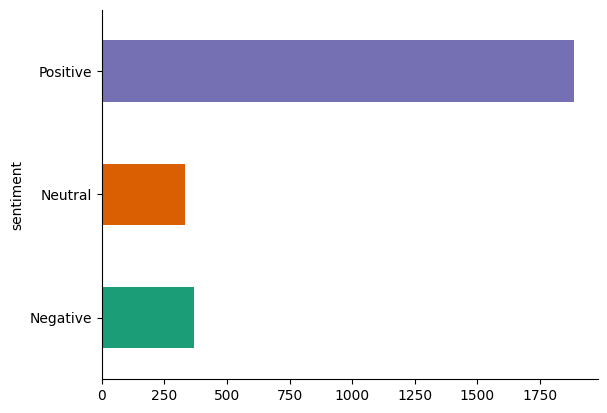

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
df_fix.groupby('sentiment').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
sentimentNegative = df_fix[df_fix["sentiment"] == 'Negative']
sentimentNegative

,reviewId,userName,content,score,reviewCreatedVersion,at,appVersion,remove_special_characters,lowercased_words,cut_mult_char,replace_slang,translated_words,tokenized_words,stopword_removal,processed_sentence,polarity_scores,compound,sentiment
1,7446777e-48c0-4e20-affb-8a6482b54a6f,christopher immanuelie,"Kalu dibandingkan aplikasi crypto lain, aplika...",1,2.46.0,12/4/2024,2.46.0,Kalu dibandingkan aplikasi crypto lain aplikas...,kalu dibandingkan aplikasi crypto lain aplikas...,kalu dibandingkan aplikasi crypto lain aplikas...,kalau dibandingkan aplikasi crypto lain aplika...,"When compared to other crypto applications, th...","[When, compared, to, other, crypto, applicatio...","[When, compared, crypto, applications, ,, appl...","When compared crypto applications , applicatio...","{'neg': 0.14, 'neu': 0.717, 'pos': 0.143, 'com...",-0.2263,Negative
2,39aa3eb3-bcfc-441c-a7ba-09e60d6e062a,Erike Pratama,"Aplikasi sudah di manipulasi agar loss, sekali...",1,2.44.0,3/16/2024,2.44.0,Aplikasi sudah di manipulasi agar loss sekali ...,aplikasi sudah di manipulasi agar loss sekali ...,aplikasi sudah di manipulasi agar loss sekali ...,aplikasi sudah di manipulasi agar loss sekali ...,The application has been manipulated so that i...,"[The, application, has, been, manipulated, so,...","[The, application, manipulated, lose, want, se...",The application manipulated lose want sell sma...,"{'neg': 0.383, 'neu': 0.358, 'pos': 0.259, 'co...",-0.6705,Negative
4,c19f599d-ce4f-4145-bb59-8dfd580ac742,Pramodana M. W.,"Pembelian harus ada batas minimal, kirim walle...",1,2.46.0,4/18/2024,2.46.0,Pembelian harus ada batas minimal kirim wallet...,pembelian harus ada batas minimal kirim wallet...,pembelian harus ada batas minimal kirim wallet...,pembelian harus ada batas minimal kirim wallet...,There must be a minimum limit for purchases wh...,"[There, must, be, a, minimum, limit, for, purc...","[There, must, minimum, limit, purchases, sendi...",There must minimum limit purchases sending wal...,"{'neg': 0.078, 'neu': 0.922, 'pos': 0.0, 'comp...",-0.2960,Negative
5,cf2933c2-39d5-440b-befd-c7a3af62b83d,Wayan Yulianto,Untuk exchange kripto lokal. Ini yg paling bad...,1,2.44.0,4/18/2024,2.44.0,Untuk exchange kripto lokal Ini yg paling bad ...,untuk exchange kripto lokal ini yg paling bad ...,untuk exchange kripto lokal ini yg paling bad ...,untuk exchange kripto lokal ini yang paling ba...,"For this local crypto exchange, the worst resp...","[For, this, local, crypto, exchange, ,, the, w...","[For, local, crypto, exchange, ,, worst, respo...","For local crypto exchange , worst response coi...","{'neg': 0.229, 'neu': 0.696, 'pos': 0.075, 'co...",-0.6850,Negative
7,3e855316-9dd7-4f6f-ad8e-268e729211e2,Dadan Wardani,"Payah banget nih aplikasi, bisa Nerima kripto ...",1,2.43.0,4/3/2024,2.43.0,Payah banget nih aplikasi bisa Nerima kripto d...,payah banget nih aplikasi bisa nerima kripto d...,payah banget nih aplikasi bisa nerima kripto d...,payah banget nih aplikasi bisa menerima kripto...,It's really bad that the application can recei...,"[It, 's, really, bad, that, the, application, ...","[It, 's, really, bad, application, receive, cr...",It 's really bad application receive crypto wa...,"{'neg': 0.183, 'neu': 0.817, 'pos': 0.0, 'comp...",-0.6582,Negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2357,4f1c539f-ca1c-4238-a7b7-0f9bb49fa540,Abdullah Zaeni,"pake kode ( abdutyg6 ) buat dapetin chip, apk ...",5,NaN,9/22/2023,NaN,pake kode abdutyg6 buat dapetin chip apk ini...,pake kode abdutyg6 buat dapetin chip apk ini...,pake kode abdutyg6 buat dapetin chip apk ini...,pakai kode abdutyg6 buat mendapatkan chip ap...,use the code abdutyg6 to get this apk chip so ...,"[use, the, code, abdutyg6, to, get, this, apk,...","[use, code, abdutyg6, get, apk, chip, 's, fun,...","use code abdutyg6 get apk chip 's fun others ,...","{'neg': 0.219, 'neu': 0.648, 'pos': 0.134, 'co...",-0.2752,Negative
2411,046c849f-8a37-47b1-940f-e74f0f8660bd,Dwi Ha

In [ ]:
sentimentNegative.to_csv('negative.csv', encoding='utf-8', index=False)

# Sentiment Analysis IndoBert

In [ ]:
import os

# Set path to your project directory
project_path = '/content/drive/MyDrive/Colab Notebooks/Skripshit'
os.chdir(project_path)

import random
import numpy as np
import pandas as pd
import torch
from torch import optim
import torch.nn.functional as F
from tqdm import tqdm
import itertools
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from transformers import BertForSequenceClassification, BertConfig, BertTokenizer
from nltk.tokenize import TweetTokenizer

# Menambahkan path ke sys.path untuk memastikan modul utils dikenali
import sys
sys.path.append('/content/drive/MyDrive/Colab Notebooks/Skripshit/utils')

# Mengimpor modul dari direktori utils
from utils.forward_fn import forward_sequence_classification
from utils.metrics import document_sentiment_metrics_fn
from utils.data_utils import DocumentSentimentDataset, DocumentSentimentDataLoader

In [ ]:
###
# common functions
###
def set_seed(seed):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)

def count_param(module, trainable=False):
    if trainable:
        return sum(p.numel() for p in module.parameters() if p.requires_grad)
    else:
        return sum(p.numel() for p in module.parameters())

def get_lr(optimizer):
    for param_group in optimizer.param_groups:
        return param_group['lr']

def metrics_to_string(metric_dict):
    string_list = []
    for key, value in metric_dict.items():
        string_list.append('{}:{:.4f}'.format(key, value))
    return ' '.join(string_list)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Set random seed
set_seed(26092020)

In [ ]:
from google.colab import drive
import pandas as pd
drive.mount('/content/drive')

# Load file CSV
csv_file_path = '/content/drive/MyDrive/Colab Notebooks/dataset/fixFinal.csv'
df = pd.read_csv(csv_file_path)
df

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<ipython-input-10-4947c240496e>:7: DtypeWarning: Columns (0,1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_file_path)


,transaksi nya cepat sih tidak tersedia laptop komputer komputer lihat grafik nya susah login website tidak saran tolong biarkan aplikasi laptop komputer komputer nya mempermudah traider grafik pergerakan harga koreksi ratingnya turunin kaspa koin tidak aplikasi lelet slow respon jaringan bagus keluhan tidak perbaiki,negative
0,kalau dibandingkan aplikasi crypto aplikasi te...,negative
1,aplikasi manipulasi loss nya jual profit tidak...,negative
2,jeleknya kalau pemeliharaan aset cryptonya bek...,positive
3,pembelian batas minimal kirim wallet minimalny...,positive
4,exchange kripto lokal bad respon deposit coin ...,negative
...,...,...
1048570,NaN,NaN
1048571,NaN,NaN
1048572,NaN,NaN
1048573,NaN,NaN


In [ ]:
df.dropna(subset=['transaksi nya cepat sih tidak tersedia laptop komputer komputer lihat grafik nya susah login website tidak saran tolong biarkan aplikasi laptop komputer komputer nya mempermudah traider grafik pergerakan harga koreksi ratingnya turunin kaspa koin tidak aplikasi lelet slow respon jaringan bagus keluhan tidak perbaiki', 'negative'], inplace=True)

In [ ]:
df.isnull().sum()

transaksi nya cepat sih tidak tersedia laptop komputer komputer lihat grafik nya susah login website tidak saran tolong biarkan aplikasi laptop komputer komputer nya mempermudah traider grafik pergerakan harga koreksi ratingnya turunin kaspa koin tidak aplikasi lelet slow respon jaringan bagus keluhan tidak perbaiki    0
negative                                                                                                                                                                                                                                                                                                                         0
dtype: int64

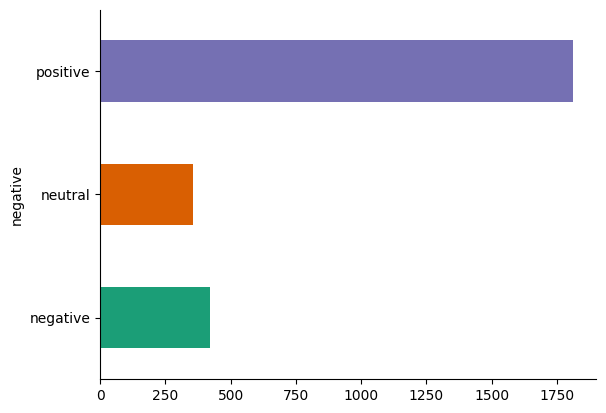

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('negative').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

## Prepare Dataset

#### Undersampling data

In [ ]:
import pandas as pd
from sklearn.utils import resample


# Asumsikan kolom label berada di urutan kedua (indeks 1)
labels = df.iloc[:, 1]

# Pisahkan dataframe berdasarkan label
df_negative = df[labels == 'negative']
df_positive = df[labels == 'positive']
df_neutral = df[labels == 'neutral']

# Tentukan jumlah maksimal untuk undersampling kelas positif
max_positive_count = 2 * len(df_negative)

# Lakukan undersampling pada kelas positif
df_positive_undersampled = resample(df_positive,
                                    replace=False,    # tidak menggandakan data
                                    n_samples=max_positive_count,    # jumlah sampel setelah undersampling
                                    random_state=42)  # memastikan hasil yang sama setiap kali dijalankan

# Gabungkan kembali dataframe negatif dan positif yang telah di-undersampling
df_undersampled = pd.concat([df_negative, df_neutral, df_positive_undersampled])

# Acak urutan data
df_undersampled = df_undersampled.sample(frac=1, random_state=42).reset_index(drop=True)

# Simpan dataframe hasil ke file CSV
output_path = '/content/drive/MyDrive/Colab Notebooks/dataset/undersampled_file.csv'
df_undersampled.to_csv(output_path, header=False, index=False)
df_undersampled


,transaksi nya cepat sih tidak tersedia laptop komputer komputer lihat grafik nya susah login website tidak saran tolong biarkan aplikasi laptop komputer komputer nya mempermudah traider grafik pergerakan harga koreksi ratingnya turunin kaspa koin tidak aplikasi lelet slow respon jaringan bagus keluhan tidak perbaiki,negative
0,jujur nyaman pakai ajaib eh error verifikasi i...,negative
1,menunggu dana tidak masuk rekening,neutral
2,proses setoran earn aktif nya,positive
3,penjualan lambat keburu turun,neutral
4,aplikasi investasi mudah pemula kayak simpan d...,positive
...,...,...
1613,aplikasinya bagus rekomended investor pemula c...,positive
1614,aplikasi nya bagus pemula investasi crypto fit...,positive
1615,aplikasinya cocok pemula fiturnya mudah dipaha...,positive
1616,aplikasinya mudah pemula gampang paham kerja a...,positive


In [ ]:

# Simpan dataframe hasil ke file CSV
output_path = '/content/drive/MyDrive/Colab Notebooks/dataset/undersampled_file2.csv'
df_undersampled.to_csv(output_path, header=False, index=False)
df_undersampled

,transaksi nya cepat sih tidak tersedia laptop komputer komputer lihat grafik nya susah login website tidak saran tolong biarkan aplikasi laptop komputer komputer nya mempermudah traider grafik pergerakan harga koreksi ratingnya turunin kaspa koin tidak aplikasi lelet slow respon jaringan bagus keluhan tidak perbaiki,negative
0,jujur nyaman pakai ajaib eh error verifikasi i...,negative
1,menunggu dana tidak masuk rekening,neutral
2,proses setoran earn aktif nya,positive
3,penjualan lambat keburu turun,neutral
4,aplikasi investasi mudah pemula kayak simpan d...,positive
...,...,...
1613,aplikasinya bagus rekomended investor pemula c...,positive
1614,aplikasi nya bagus pemula investasi crypto fit...,positive
1615,aplikasinya cocok pemula fiturnya mudah dipaha...,positive
1616,aplikasinya mudah pemula gampang paham kerja a...,positive


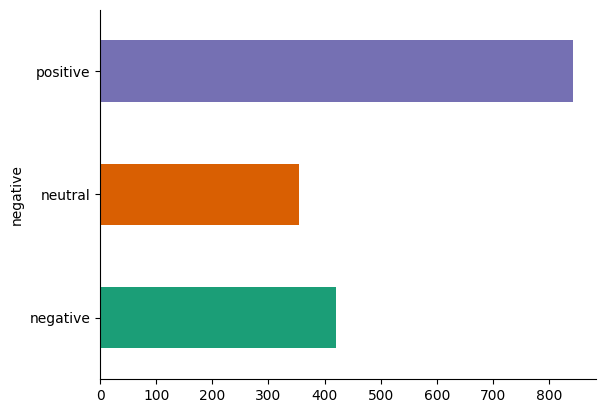

In [ ]:
# @title negative

from matplotlib import pyplot as plt
import seaborn as sns
df_undersampled.groupby('negative').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

#### split data

In [ ]:
from google.colab import drive
import pandas as pd
from sklearn.model_selection import train_test_split

# Mount Google Drive
drive.mount('/content/drive')

# Load file CSV
csv_file_path = '/content/drive/MyDrive/Colab Notebooks/dataset/undersampled_file2.csv'
df = pd.read_csv(csv_file_path)

# Split dataset
train1_df, val1_df = train_test_split(df, test_size=0.3, random_state=42)
train2_df, val2_df = train_test_split(df, test_size=0.2, random_state=42)

# Save the split datasets as CSV 70:30
train1_file_path = '/content/drive/MyDrive/Colab Notebooks/dataset/datasetReady/train1_file.csv'
train1_df.to_csv(train1_file_path, index=False)

val1_file_path = '/content/drive/MyDrive/Colab Notebooks/dataset/datasetReady/val1_file.csv'
val1_df.to_csv(val1_file_path, index=False)


#another split 80:20
train2_file_path = '/content/drive/MyDrive/Colab Notebooks/dataset/datasetReady/train2_file.csv'
train2_df.to_csv(train2_file_path, index=False)

val2_file_path = '/content/drive/MyDrive/Colab Notebooks/dataset/datasetReady/val2_file.csv'
val2_df.to_csv(val2_file_path, index=False)


# Jika ingin menyimpan sebagai TSV 70:30
train1_tsv = '/content/drive/MyDrive/Colab Notebooks/dataset/datasetReady/train1_file.tsv'
train1_df.to_csv(train1_tsv, sep='\t', index=False)

val1_tsv = '/content/drive/MyDrive/Colab Notebooks/dataset/datasetReady/val1_file.tsv'
val1_df.to_csv(val1_tsv, sep='\t', index=False)

# Jika ingin menyimpan sebagai TSV 80:20
train2_tsv = '/content/drive/MyDrive/Colab Notebooks/dataset/datasetReady/train2_file.tsv'
train2_df.to_csv(train2_tsv, sep='\t', index=False)

val2_tsv = '/content/drive/MyDrive/Colab Notebooks/dataset/datasetReady/val2_file.tsv'
val2_df.to_csv(val2_tsv, sep='\t', index=False)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# 70:30
train_dataset_path = '/content/drive/MyDrive/Colab Notebooks/dataset/datasetReady/train1_file.tsv'
valid_dataset_path = '/content/drive/MyDrive/Colab Notebooks/dataset/datasetReady/val1_file.tsv'

# 80:20
train2_dataset_path = '/content/drive/MyDrive/Colab Notebooks/dataset/datasetReady/train2_file.tsv'
valid2_dataset_path = '/content/drive/MyDrive/Colab Notebooks/dataset/datasetReady/val2_file.tsv'


In [ ]:
tokenizer = BertTokenizer.from_pretrained('indobenchmark/indobert-base-p1')

#70:30
train_dataset = DocumentSentimentDataset(train_dataset_path, tokenizer, lowercase=True)
valid_dataset = DocumentSentimentDataset(valid_dataset_path, tokenizer, lowercase=True)

train_loader = DocumentSentimentDataLoader(dataset=train_dataset, max_seq_len=512, batch_size=32, num_workers=16, shuffle=True)
valid_loader = DocumentSentimentDataLoader(dataset=valid_dataset, max_seq_len=512, batch_size=32, num_workers=16, shuffle=False)

# 80:20
train2_dataset = DocumentSentimentDataset(train2_dataset_path, tokenizer, lowercase=True)
valid2_dataset = DocumentSentimentDataset(valid2_dataset_path, tokenizer, lowercase=True)

train2_loader = DocumentSentimentDataLoader(dataset=train2_dataset, max_seq_len=512, batch_size=32, num_workers=16, shuffle=True)
valid2_loader = DocumentSentimentDataLoader(dataset=valid2_dataset, max_seq_len=512, batch_size=32, num_workers=16, shuffle=False)


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/229k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/1.53k [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 16 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 16 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


In [ ]:
w2i, i2w = DocumentSentimentDataset.LABEL2INDEX, DocumentSentimentDataset.INDEX2LABEL
print(w2i)
print(i2w)

{'positive': 0, 'neutral': 1, 'negative': 2}
{0: 'positive', 1: 'neutral', 2: 'negative'}


## Fine Tuning & Evaluation

In [ ]:
# Load Tokenizer and Config

config = BertConfig.from_pretrained('indobenchmark/indobert-base-p1')
config.num_labels = DocumentSentimentDataset.NUM_LABELS

# Instantiate model
model = BertForSequenceClassification.from_pretrained('indobenchmark/indobert-base-p1', config=config)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


pytorch_model.bin:   0%|          | 0.00/498M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at indobenchmark/indobert-base-p1 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
optimizer = optim.Adam(model.parameters(), lr=5e-5)
model = model.cuda()


In [ ]:
model

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(50000, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e

In [ ]:
import torch

# Hapus model yang sudah ada
del model

# Opsi tambahan jika perlu, lakukan garbage collection
torch.cuda.empty_cache()

#### train test

#### train

In [ ]:
import torch
from tqdm import tqdm
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
train_metrics_list = []
valid_metrics_list = []

In [ ]:
ske_num = 2

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at indobenchmark/indobert-base-p1 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
  0%|          | 0/36 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 16 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
(Epoch 1) TRAIN LOSS:0.8823 LR:0.00000500: 100%|██████████| 36/36 [00:10<00:00,  3.54it/s]


(Epoch 1) TRAIN LOSS:0.8823 ACC:0.5769 F1:0.4234 REC:0.4370 PRE:0.5099 LR:0.00000500


  0%|          | 0/16 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 16 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
VALID LOSS:0.7185: 100%|██████████| 16/16 [00:02<00:00,  6.72it/s]


(Epoch 1) VALID LOSS:0.7185 ACC:0.6982 F1:0.6603 REC:0.6572 PRE:0.6667


  0%|          | 0/36 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 16 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
(Epoch 2) TRAIN LOSS:0.6416 LR:0.00000500: 100%|██████████| 36/36 [00:09<00:00,  3.72it/s]


(Epoch 2) TRAIN LOSS:0.6416 ACC:0.7306 F1:0.6764 REC:0.6781 PRE:0.6816 LR:0.00000500


  0%|          | 0/16 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 16 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
VALID LOSS:0.5940: 100%|██████████| 16/16 [00:03<00:00,  4.91it/s]


(Epoch 2) VALID LOSS:0.5940 ACC:0.7639 F1:0.7330 REC:0.7341 PRE:0.7468


  0%|          | 0/36 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 16 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
(Epoch 3) TRAIN LOSS:0.5164 LR:0.00000500: 100%|██████████| 36/36 [00:09<00:00,  3.77it/s]


(Epoch 3) TRAIN LOSS:0.5164 ACC:0.8057 F1:0.7620 REC:0.7603 PRE:0.7725 LR:0.00000500


  0%|          | 0/16 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 16 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
VALID LOSS:0.5410: 100%|██████████| 16/16 [00:02<00:00,  5.54it/s]


(Epoch 3) VALID LOSS:0.5410 ACC:0.7967 F1:0.7691 REC:0.7713 PRE:0.7693


  0%|          | 0/36 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 16 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
(Epoch 4) TRAIN LOSS:0.4217 LR:0.00000500: 100%|██████████| 36/36 [00:10<00:00,  3.34it/s]


(Epoch 4) TRAIN LOSS:0.4217 ACC:0.8498 F1:0.8198 REC:0.8230 PRE:0.8184 LR:0.00000500


  0%|          | 0/16 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 16 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
VALID LOSS:0.5098: 100%|██████████| 16/16 [00:02<00:00,  6.79it/s]


(Epoch 4) VALID LOSS:0.5098 ACC:0.8131 F1:0.7894 REC:0.7864 PRE:0.7928


  0%|          | 0/36 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 16 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
(Epoch 5) TRAIN LOSS:0.3351 LR:0.00000500: 100%|██████████| 36/36 [00:09<00:00,  3.85it/s]


(Epoch 5) TRAIN LOSS:0.3351 ACC:0.8860 F1:0.8640 REC:0.8680 PRE:0.8609 LR:0.00000500


  0%|          | 0/16 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 16 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
VALID LOSS:0.5010: 100%|██████████| 16/16 [00:02<00:00,  6.61it/s]


(Epoch 5) VALID LOSS:0.5010 ACC:0.8296 F1:0.8113 REC:0.8158 PRE:0.8079


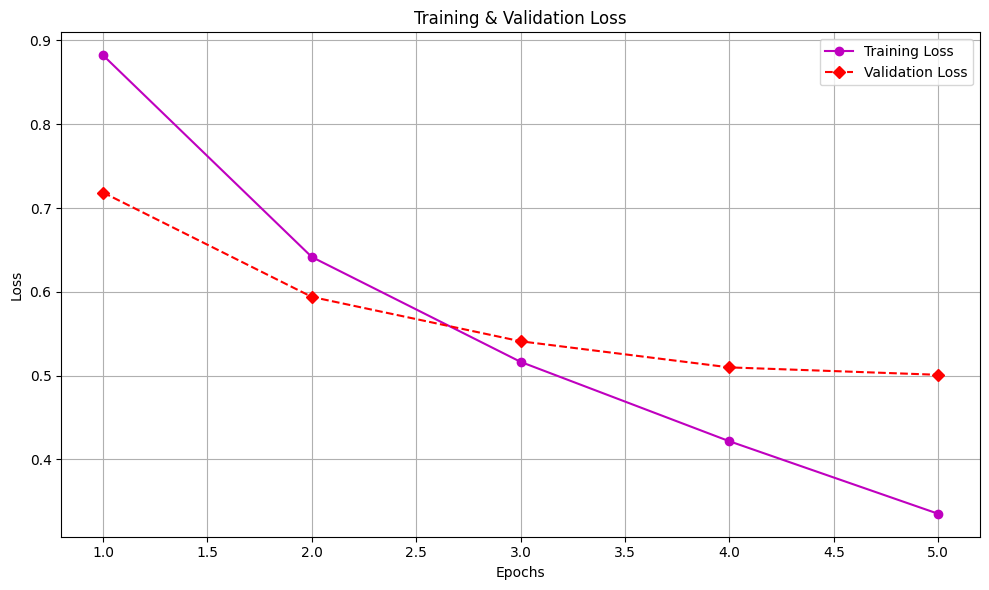

Confusion Matrix:
 [[103  17  12]
 [ 16  89   7]
 [ 23   8 212]]
Classification Report:
               precision    recall  f1-score   support

    negative       0.73      0.78      0.75       132
     neutral       0.78      0.79      0.79       112
    positive       0.92      0.87      0.89       243

    accuracy                           0.83       487
   macro avg       0.81      0.82      0.81       487
weighted avg       0.83      0.83      0.83       487



Some weights of BertForSequenceClassification were not initialized from the model checkpoint at indobenchmark/indobert-base-p1 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
  0%|          | 0/36 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 16 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
(Epoch 1) TRAIN LOSS:0.9411 LR:0.00000500: 100%|██████████| 36/36 [00:09<00:00,  3.72it/s]


(Epoch 1) TRAIN LOSS:0.9411 ACC:0.5265 F1:0.3726 REC:0.3914 PRE:0.4370 LR:0.00000500


  0%|          | 0/16 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 16 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
VALID LOSS:0.7686: 100%|██████████| 16/16 [00:02<00:00,  6.16it/s]


(Epoch 1) VALID LOSS:0.7686 ACC:0.6653 F1:0.6201 REC:0.6173 PRE:0.6252


  0%|          | 0/36 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 16 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
(Epoch 2) TRAIN LOSS:0.6785 LR:0.00000500: 100%|██████████| 36/36 [00:09<00:00,  3.82it/s]


(Epoch 2) TRAIN LOSS:0.6785 ACC:0.7058 F1:0.6486 REC:0.6458 PRE:0.6543 LR:0.00000500


  0%|          | 0/16 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 16 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
VALID LOSS:0.6131: 100%|██████████| 16/16 [00:03<00:00,  4.83it/s]


(Epoch 2) VALID LOSS:0.6131 ACC:0.7310 F1:0.6982 REC:0.7028 PRE:0.6951


  0%|          | 0/36 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 16 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
(Epoch 3) TRAIN LOSS:0.5391 LR:0.00000500: 100%|██████████| 36/36 [00:09<00:00,  3.81it/s]


(Epoch 3) TRAIN LOSS:0.5391 ACC:0.7827 F1:0.7392 REC:0.7399 PRE:0.7402 LR:0.00000500


  0%|          | 0/16 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 16 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
VALID LOSS:0.5439: 100%|██████████| 16/16 [00:02<00:00,  5.48it/s]


(Epoch 3) VALID LOSS:0.5439 ACC:0.7864 F1:0.7593 REC:0.7587 PRE:0.7599


  0%|          | 0/36 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 16 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
(Epoch 4) TRAIN LOSS:0.4155 LR:0.00000500: 100%|██████████| 36/36 [00:10<00:00,  3.40it/s]


(Epoch 4) TRAIN LOSS:0.4155 ACC:0.8578 F1:0.8318 REC:0.8331 PRE:0.8319 LR:0.00000500


  0%|          | 0/16 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 16 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
VALID LOSS:0.5174: 100%|██████████| 16/16 [00:02<00:00,  6.78it/s]


(Epoch 4) VALID LOSS:0.5174 ACC:0.8131 F1:0.7914 REC:0.7961 PRE:0.7878


  0%|          | 0/36 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 16 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
(Epoch 5) TRAIN LOSS:0.3265 LR:0.00000500: 100%|██████████| 36/36 [00:09<00:00,  3.77it/s]


(Epoch 5) TRAIN LOSS:0.3265 ACC:0.8887 F1:0.8663 REC:0.8707 PRE:0.8631 LR:0.00000500


  0%|          | 0/16 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 16 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
VALID LOSS:0.5322: 100%|██████████| 16/16 [00:02<00:00,  5.98it/s]


(Epoch 5) VALID LOSS:0.5322 ACC:0.8131 F1:0.7887 REC:0.7912 PRE:0.7870


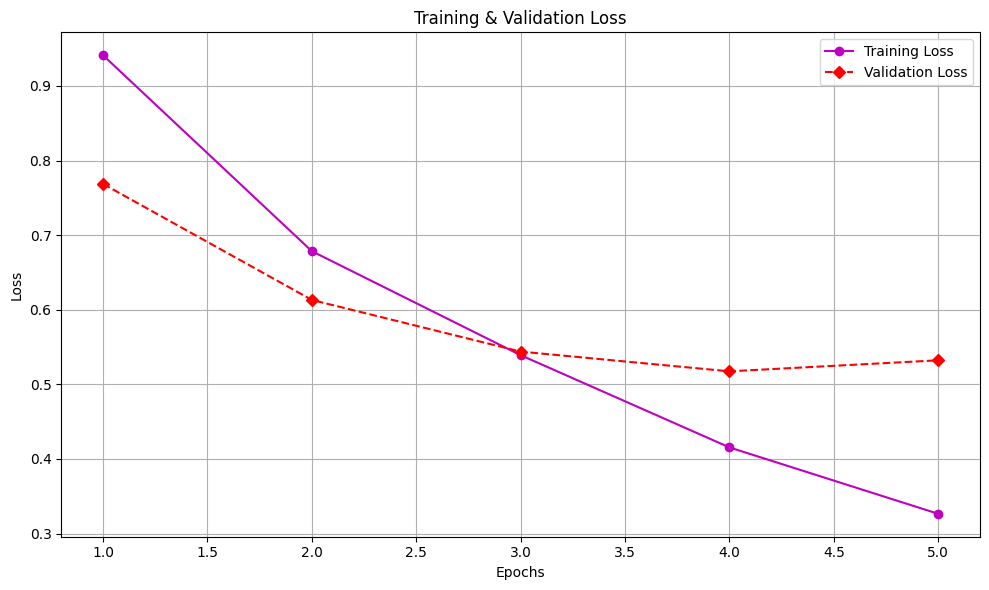

Confusion Matrix:
 [[ 94  23  15]
 [ 15  87  10]
 [ 18  10 215]]
Classification Report:
               precision    recall  f1-score   support

    negative       0.74      0.71      0.73       132
     neutral       0.72      0.78      0.75       112
    positive       0.90      0.88      0.89       243

    accuracy                           0.81       487
   macro avg       0.79      0.79      0.79       487
weighted avg       0.81      0.81      0.81       487



Some weights of BertForSequenceClassification were not initialized from the model checkpoint at indobenchmark/indobert-base-p1 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
  0%|          | 0/36 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 16 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
(Epoch 1) TRAIN LOSS:0.8469 LR:0.00000500: 100%|██████████| 36/36 [00:09<00:00,  3.67it/s]


(Epoch 1) TRAIN LOSS:0.8469 ACC:0.6113 F1:0.4749 REC:0.4792 PRE:0.5549 LR:0.00000500


  0%|          | 0/16 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 16 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
VALID LOSS:0.6990: 100%|██████████| 16/16 [00:03<00:00,  4.71it/s]


(Epoch 1) VALID LOSS:0.6990 ACC:0.6899 F1:0.6294 REC:0.6195 PRE:0.6591


  0%|          | 0/36 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 16 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
(Epoch 2) TRAIN LOSS:0.6220 LR:0.00000500: 100%|██████████| 36/36 [00:09<00:00,  3.79it/s]


(Epoch 2) TRAIN LOSS:0.6220 ACC:0.7588 F1:0.7024 REC:0.7003 PRE:0.7152 LR:0.00000500


  0%|          | 0/16 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 16 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
VALID LOSS:0.5703: 100%|██████████| 16/16 [00:03<00:00,  5.10it/s]


(Epoch 2) VALID LOSS:0.5703 ACC:0.7803 F1:0.7496 REC:0.7519 PRE:0.7489


  0%|          | 0/36 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 16 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
(Epoch 3) TRAIN LOSS:0.4880 LR:0.00000500: 100%|██████████| 36/36 [00:10<00:00,  3.37it/s]


(Epoch 3) TRAIN LOSS:0.4880 ACC:0.8277 F1:0.7910 REC:0.7911 PRE:0.7940 LR:0.00000500


  0%|          | 0/16 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 16 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
VALID LOSS:0.5390: 100%|██████████| 16/16 [00:02<00:00,  6.71it/s]


(Epoch 3) VALID LOSS:0.5390 ACC:0.8090 F1:0.7829 REC:0.7784 PRE:0.7883


  0%|          | 0/36 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 16 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
(Epoch 4) TRAIN LOSS:0.3875 LR:0.00000500: 100%|██████████| 36/36 [00:09<00:00,  3.76it/s]


(Epoch 4) TRAIN LOSS:0.3875 ACC:0.8622 F1:0.8320 REC:0.8326 PRE:0.8317 LR:0.00000500


  0%|          | 0/16 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 16 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
VALID LOSS:0.5250: 100%|██████████| 16/16 [00:02<00:00,  6.77it/s]


(Epoch 4) VALID LOSS:0.5250 ACC:0.8152 F1:0.7932 REC:0.7926 PRE:0.7938


  0%|          | 0/36 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 16 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
(Epoch 5) TRAIN LOSS:0.3027 LR:0.00000500: 100%|██████████| 36/36 [00:09<00:00,  3.81it/s]


(Epoch 5) TRAIN LOSS:0.3027 ACC:0.9002 F1:0.8769 REC:0.8766 PRE:0.8771 LR:0.00000500


  0%|          | 0/16 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 16 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
VALID LOSS:0.5406: 100%|██████████| 16/16 [00:03<00:00,  4.81it/s]


(Epoch 5) VALID LOSS:0.5406 ACC:0.7988 F1:0.7731 REC:0.7813 PRE:0.7719


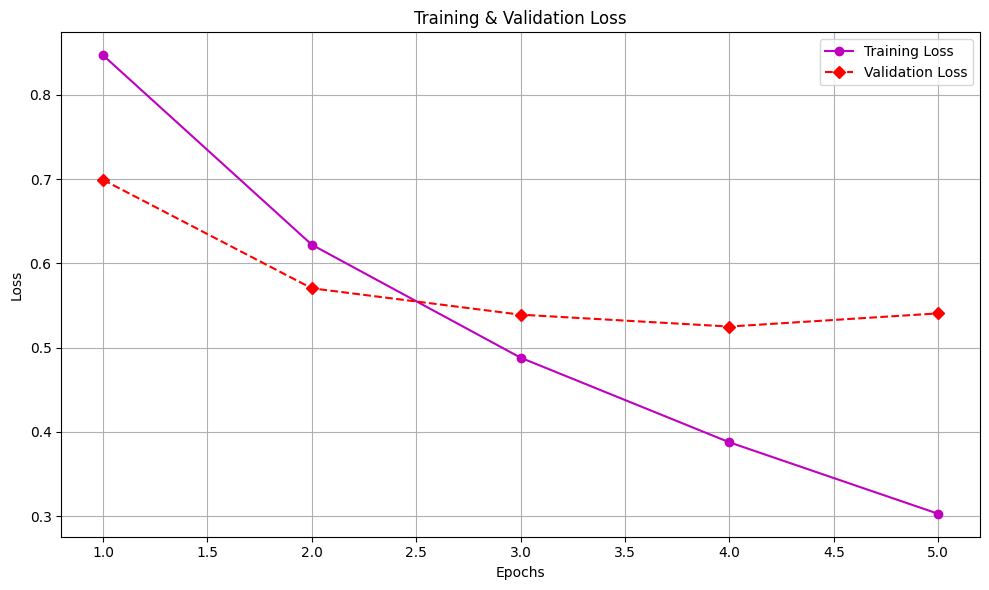

Confusion Matrix:
 [[ 84  31  17]
 [ 10  94   8]
 [ 21  11 211]]
Classification Report:
               precision    recall  f1-score   support

    negative       0.73      0.64      0.68       132
     neutral       0.69      0.84      0.76       112
    positive       0.89      0.87      0.88       243

    accuracy                           0.80       487
   macro avg       0.77      0.78      0.77       487
weighted avg       0.80      0.80      0.80       487



Some weights of BertForSequenceClassification were not initialized from the model checkpoint at indobenchmark/indobert-base-p1 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
  0%|          | 0/36 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 16 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
(Epoch 1) TRAIN LOSS:0.9443 LR:0.00000500: 100%|██████████| 36/36 [00:09<00:00,  3.73it/s]


(Epoch 1) TRAIN LOSS:0.9443 ACC:0.5380 F1:0.3639 REC:0.4005 PRE:0.5138 LR:0.00000500


  0%|          | 0/16 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 16 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
VALID LOSS:0.7789: 100%|██████████| 16/16 [00:03<00:00,  4.95it/s]


(Epoch 1) VALID LOSS:0.7789 ACC:0.6571 F1:0.5659 REC:0.5584 PRE:0.7290


  0%|          | 0/36 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 16 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
(Epoch 2) TRAIN LOSS:0.6830 LR:0.00000500: 100%|██████████| 36/36 [00:09<00:00,  3.79it/s]


(Epoch 2) TRAIN LOSS:0.6830 ACC:0.7120 F1:0.6479 REC:0.6430 PRE:0.6627 LR:0.00000500


  0%|          | 0/16 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 16 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
VALID LOSS:0.5971: 100%|██████████| 16/16 [00:02<00:00,  5.34it/s]


(Epoch 2) VALID LOSS:0.5971 ACC:0.7392 F1:0.7111 REC:0.7182 PRE:0.7081


  0%|          | 0/36 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 16 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
(Epoch 3) TRAIN LOSS:0.5181 LR:0.00000500: 100%|██████████| 36/36 [00:10<00:00,  3.31it/s]


(Epoch 3) TRAIN LOSS:0.5181 ACC:0.8145 F1:0.7792 REC:0.7800 PRE:0.7818 LR:0.00000500


  0%|          | 0/16 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 16 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
VALID LOSS:0.5481: 100%|██████████| 16/16 [00:02<00:00,  6.73it/s]


(Epoch 3) VALID LOSS:0.5481 ACC:0.7762 F1:0.7439 REC:0.7451 PRE:0.7464


  0%|          | 0/36 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 16 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
(Epoch 4) TRAIN LOSS:0.4160 LR:0.00000500: 100%|██████████| 36/36 [00:09<00:00,  3.75it/s]


(Epoch 4) TRAIN LOSS:0.4160 ACC:0.8428 F1:0.8153 REC:0.8181 PRE:0.8131 LR:0.00000500


  0%|          | 0/16 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 16 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
VALID LOSS:0.5098: 100%|██████████| 16/16 [00:02<00:00,  6.50it/s]


(Epoch 4) VALID LOSS:0.5098 ACC:0.8049 F1:0.7775 REC:0.7748 PRE:0.7820


  0%|          | 0/36 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 16 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
(Epoch 5) TRAIN LOSS:0.3249 LR:0.00000500: 100%|██████████| 36/36 [00:09<00:00,  3.62it/s]


(Epoch 5) TRAIN LOSS:0.3249 ACC:0.8869 F1:0.8661 REC:0.8692 PRE:0.8642 LR:0.00000500


  0%|          | 0/16 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 16 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
VALID LOSS:0.5173: 100%|██████████| 16/16 [00:03<00:00,  4.99it/s]


(Epoch 5) VALID LOSS:0.5173 ACC:0.8214 F1:0.7974 REC:0.7947 PRE:0.8004


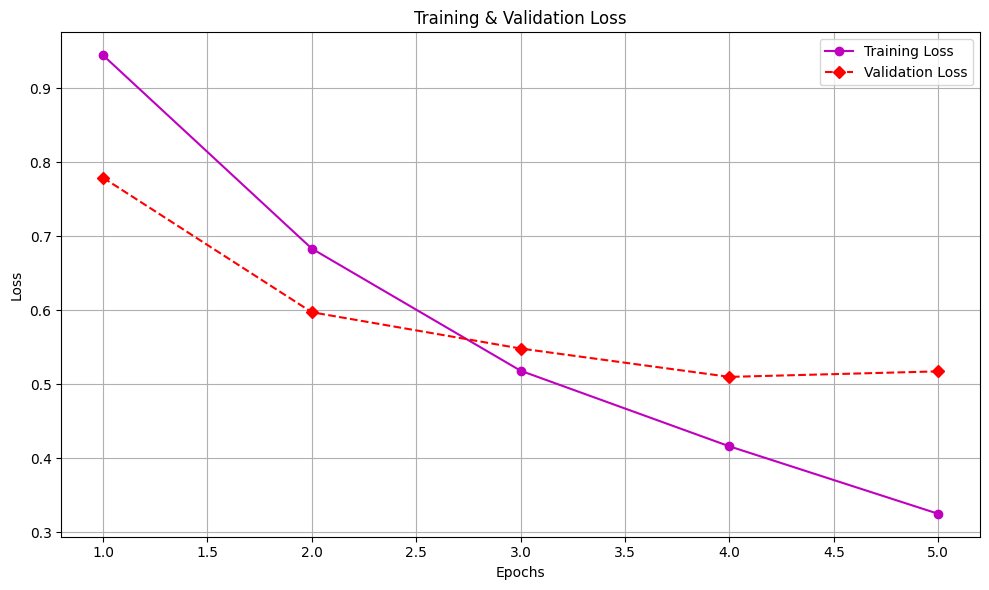

Confusion Matrix:
 [[ 95  20  17]
 [ 15  85  12]
 [ 20   3 220]]
Classification Report:
               precision    recall  f1-score   support

    negative       0.73      0.72      0.73       132
     neutral       0.79      0.76      0.77       112
    positive       0.88      0.91      0.89       243

    accuracy                           0.82       487
   macro avg       0.80      0.79      0.80       487
weighted avg       0.82      0.82      0.82       487



In [ ]:
iterasi = 4 # jumlah iterasi
for iter in range(iterasi):
  import torch

# Hapus model yang sudah ada
  del model

# Opsi tambahan jika perlu, lakukan garbage collection
  torch.cuda.empty_cache()

  model = BertForSequenceClassification.from_pretrained('indobenchmark/indobert-base-p1', config=config)
  optimizer = optim.Adam(model.parameters(), lr=5e-6)
  model = model.cuda()


  import matplotlib.pyplot as plt

# Inisialisasi list untuk menyimpan loss dari setiap epoch
  train_losses = []
  valid_losses = []

  n_epochs = 5
  for epoch in range(n_epochs):
      model.train()
      torch.set_grad_enabled(True)

      total_train_loss = 0
      list_hyp_train, list_label_train = [], []

      train_pbar = tqdm(train_loader, leave=True, total=len(train_loader))
      for i, batch_data in enumerate(train_pbar):
          # Forward model
          loss, batch_hyp, batch_label = forward_sequence_classification(model, batch_data[:-1], i2w=i2w, device='cuda')

          # Update model
          optimizer.zero_grad()
          loss.backward()
          optimizer.step()

          tr_loss = loss.item()
          total_train_loss += tr_loss

          # Calculate metrics
          list_hyp_train += batch_hyp
          list_label_train += batch_label

          train_pbar.set_description("(Epoch {}) TRAIN LOSS:{:.4f} LR:{:.8f}".format((epoch+1),
              total_train_loss/(i+1), get_lr(optimizer)))

      # Calculate train metrics
      train_metrics = document_sentiment_metrics_fn(list_hyp_train, list_label_train)
      print("(Epoch {}) TRAIN LOSS:{:.4f} {} LR:{:.8f}".format((epoch+1),
          total_train_loss/(i+1), metrics_to_string(train_metrics), get_lr(optimizer)))


      # Evaluate on validation
      model.eval()
      torch.set_grad_enabled(False)

      total_loss, list_hyp_valid, list_label_valid = 0, [], []

      pbar = tqdm(valid_loader, leave=True, total=len(valid_loader))
      for i, batch_data in enumerate(pbar):
          batch_seq = batch_data[-1]
          loss, batch_hyp, batch_label = forward_sequence_classification(model, batch_data[:-1], i2w=i2w, device='cuda')

          # Calculate total loss
          valid_loss = loss.item()
          total_loss += valid_loss

          # Collect predictions and labels for validation
          list_hyp_valid += batch_hyp
          list_label_valid += batch_label

          pbar.set_description("VALID LOSS:{:.4f}".format(total_loss/(i+1)))

      # Calculate validation metrics
      valid_metrics = document_sentiment_metrics_fn(list_hyp_valid, list_label_valid)
      print("(Epoch {}) VALID LOSS:{:.4f} {}".format((epoch+1),
          total_loss/(i+1), metrics_to_string(valid_metrics)))

      # Append losses for plotting
      train_losses.append(total_train_loss / len(train_loader))
      valid_losses.append(total_loss / len(valid_loader))

      if epoch+1 == n_epochs:
        train_metrics_list.append({
          "ACC": train_metrics["ACC"],
          "PRE": valid_metrics["PRE"],
          "REC": valid_metrics["REC"],
          "F1": train_metrics["F1"],
          "Loss": total_train_loss / len(train_loader)
        })
        valid_metrics_list.append({
          "ACC": valid_metrics["ACC"],
          "PRE": valid_metrics["PRE"],
          "REC": valid_metrics["REC"],
          "F1": valid_metrics["F1"],
          "Loss": total_loss / len(valid_loader)  # atau sesuaikan dengan perhitungan loss yang benar
        })


  # Plot Training & Validation Loss
  plt.figure(figsize=(10, 6))
  plt.plot(range(1, n_epochs + 1), train_losses, 'mo-', label='Training Loss')
  plt.plot(range(1, n_epochs + 1), valid_losses, 'rD--', label='Validation Loss')
  plt.title('Training & Validation Loss')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()
  plt.grid(True)
  plt.tight_layout()
  plt.show()

  # Calculate confusion matrix and classification report
  conf_matrix = confusion_matrix(list_label_valid, list_hyp_valid)
  print("Confusion Matrix:\n", conf_matrix)

  class_report = classification_report(list_label_valid, list_hyp_valid)
  print("Classification Report:\n", class_report)


In [ ]:
train_metrics_list

[{'ACC': 0.7252650176678446,
  'PRE': 0.7098410087719298,
  'REC': 0.6961646892202448,
  'F1': 0.6588024010691294,
  'Loss': 0.655823272963365},
 {'ACC': 0.726148409893993,
  'PRE': 0.6766085845840447,
  'REC': 0.6398831792350311,
  'F1': 0.6408930230321227,
  'Loss': 0.6619506412082248},
 {'ACC': 0.7234982332155477,
  'PRE': 0.6849601500679324,
  'REC': 0.6759815972778936,
  'F1': 0.6523624932302822,
  'Loss': 0.6726221806473203},
 {'ACC': 0.7367491166077739,
  'PRE': 0.6672641077035689,
  'REC': 0.6574174282507615,
  'F1': 0.6718829973754996,
  'Loss': 0.6613240357902315},
 {'ACC': 0.6157243816254417,
  'PRE': 0.591795703401778,
  'REC': 0.5008840610692462,
  'F1': 0.47150370109620493,
  'Loss': 0.8292815238237381},
 {'ACC': 0.6024734982332155,
  'PRE': 0.6063626260220688,
  'REC': 0.4826516932998414,
  'F1': 0.4492745665899546,
  'Loss': 0.8496807151370578},
 {'ACC': 0.5892226148409894,
  'PRE': 0.7400322190898107,
  'REC': 0.509873870984982,
  'F1': 0.4265889770358293,
  'Loss': 0.

In [ ]:
valid_metrics_list

[{'ACC': 0.7392197125256673,
  'PRE': 0.7098410087719298,
  'REC': 0.6961646892202448,
  'F1': 0.7013436828713067,
  'Loss': 0.6504082512110472},
 {'ACC': 0.6960985626283368,
  'PRE': 0.6766085845840447,
  'REC': 0.6398831792350311,
  'F1': 0.6428658248362482,
  'Loss': 0.6765245217829943},
 {'ACC': 0.7248459958932238,
  'PRE': 0.6849601500679324,
  'REC': 0.6759815972778936,
  'F1': 0.6794325224874095,
  'Loss': 0.6743446849286556},
 {'ACC': 0.7063655030800822,
  'PRE': 0.6672641077035689,
  'REC': 0.6574174282507615,
  'F1': 0.6611550796176303,
  'Loss': 0.6618056930601597},
 {'ACC': 0.5995893223819302,
  'PRE': 0.591795703401778,
  'REC': 0.5008840610692462,
  'F1': 0.4947529760679135,
  'Loss': 0.8174674026668072},
 {'ACC': 0.5954825462012321,
  'PRE': 0.6063626260220688,
  'REC': 0.4826516932998414,
  'F1': 0.4821159454182744,
  'Loss': 0.8287058100104332},
 {'ACC': 0.6078028747433265,
  'PRE': 0.7400322190898107,
  'REC': 0.509873870984982,
  'F1': 0.44894339552585166,
  'Loss': 

In [ ]:
df_train = pd.DataFrame(train_metrics_list)

# Membuat DataFrame untuk validation
df_validation = pd.DataFrame(valid_metrics_list)
df_validation.to_csv('/content/drive/MyDrive/Colab Notebooks/Skripshit/pengujian/S2-TR.csv', index=False)
df_train.to_csv('/content/drive/MyDrive/Colab Notebooks/Skripshit/pengujian/S2-VL.csv', index=False)

  0%|          | 0/36 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 16 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
(Epoch 1) TRAIN LOSS:0.6250 LR:0.00005000: 100%|██████████| 36/36 [00:09<00:00,  3.87it/s]


(Epoch 1) TRAIN LOSS:0.6250 ACC:0.7420 F1:0.6827 REC:0.6762 PRE:0.6952 LR:0.00005000


  0%|          | 0/16 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 16 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
VALID LOSS:0.5507: 100%|██████████| 16/16 [00:03<00:00,  4.84it/s]


(Epoch 1) VALID LOSS:0.5507 ACC:0.8049 F1:0.7875 REC:0.7988 PRE:0.7805


  0%|          | 0/36 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 16 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
(Epoch 2) TRAIN LOSS:0.3711 LR:0.00005000: 100%|██████████| 36/36 [00:09<00:00,  3.81it/s]


(Epoch 2) TRAIN LOSS:0.3711 ACC:0.8587 F1:0.8342 REC:0.8410 PRE:0.8288 LR:0.00005000


  0%|          | 0/16 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 16 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
VALID LOSS:0.4942: 100%|██████████| 16/16 [00:03<00:00,  5.29it/s]


(Epoch 2) VALID LOSS:0.4942 ACC:0.8172 F1:0.7922 REC:0.7898 PRE:0.7965


  0%|          | 0/36 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 16 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
(Epoch 3) TRAIN LOSS:0.2089 LR:0.00005000: 100%|██████████| 36/36 [00:10<00:00,  3.44it/s]


(Epoch 3) TRAIN LOSS:0.2089 ACC:0.9337 F1:0.9188 REC:0.9185 PRE:0.9195 LR:0.00005000


  0%|          | 0/16 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 16 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
VALID LOSS:0.6874: 100%|██████████| 16/16 [00:02<00:00,  6.50it/s]


(Epoch 3) VALID LOSS:0.6874 ACC:0.7721 F1:0.7356 REC:0.7287 PRE:0.7733


  0%|          | 0/36 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 16 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
(Epoch 4) TRAIN LOSS:0.1529 LR:0.00005000: 100%|██████████| 36/36 [00:09<00:00,  3.61it/s]


(Epoch 4) TRAIN LOSS:0.1529 ACC:0.9488 F1:0.9381 REC:0.9362 PRE:0.9407 LR:0.00005000


  0%|          | 0/16 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 16 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
VALID LOSS:0.6169: 100%|██████████| 16/16 [00:02<00:00,  6.19it/s]


(Epoch 4) VALID LOSS:0.6169 ACC:0.8193 F1:0.7967 REC:0.8095 PRE:0.7937


  0%|          | 0/36 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 16 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
(Epoch 5) TRAIN LOSS:0.1017 LR:0.00005000: 100%|██████████| 36/36 [00:10<00:00,  3.59it/s]


(Epoch 5) TRAIN LOSS:0.1017 ACC:0.9682 F1:0.9630 REC:0.9664 PRE:0.9598 LR:0.00005000


  0%|          | 0/16 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 16 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
VALID LOSS:0.6365: 100%|██████████| 16/16 [00:03<00:00,  4.72it/s]


(Epoch 5) VALID LOSS:0.6365 ACC:0.8316 F1:0.8121 REC:0.8164 PRE:0.8102


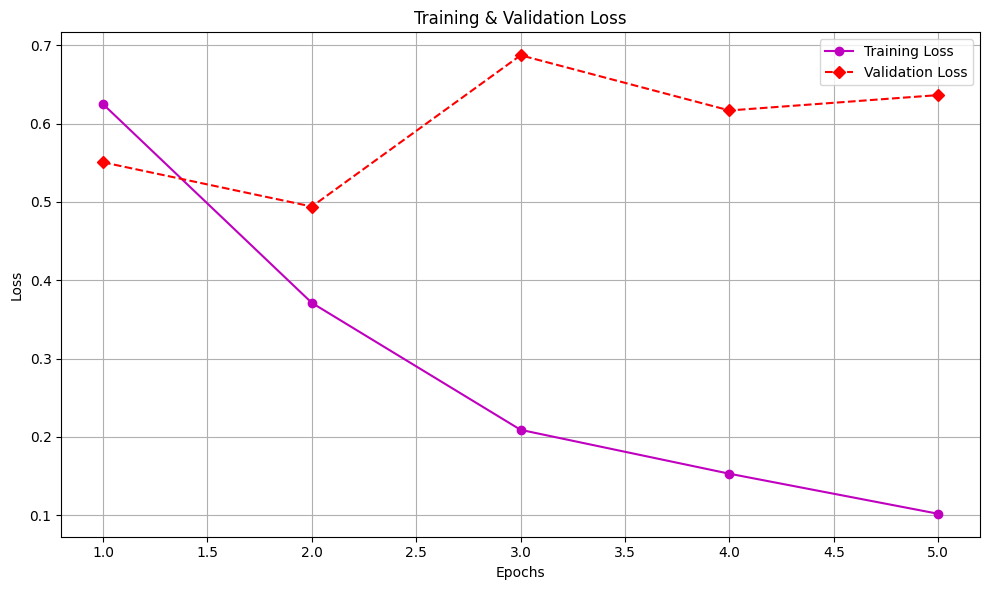

Confusion Matrix:
 [[ 94  23  15]
 [  8  95   9]
 [ 20   7 216]]
Classification Report:
               precision    recall  f1-score   support

    negative       0.77      0.71      0.74       132
     neutral       0.76      0.85      0.80       112
    positive       0.90      0.89      0.89       243

    accuracy                           0.83       487
   macro avg       0.81      0.82      0.81       487
weighted avg       0.83      0.83      0.83       487



In [ ]:
import matplotlib.pyplot as plt

# Inisialisasi list untuk menyimpan loss dari setiap epoch
train_losses = []
valid_losses = []

n_epochs = 5
for epoch in range(n_epochs):
    model.train()
    torch.set_grad_enabled(True)

    total_train_loss = 0
    list_hyp_train, list_label_train = [], []

    train_pbar = tqdm(train_loader, leave=True, total=len(train_loader))
    for i, batch_data in enumerate(train_pbar):
        # Forward model
        loss, batch_hyp, batch_label = forward_sequence_classification(model, batch_data[:-1], i2w=i2w, device='cuda')

        # Update model
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        tr_loss = loss.item()
        total_train_loss += tr_loss

        # Calculate metrics
        list_hyp_train += batch_hyp
        list_label_train += batch_label

        train_pbar.set_description("(Epoch {}) TRAIN LOSS:{:.4f} LR:{:.8f}".format((epoch+1),
            total_train_loss/(i+1), get_lr(optimizer)))

    # Calculate train metrics
    train_metrics = document_sentiment_metrics_fn(list_hyp_train, list_label_train)
    print("(Epoch {}) TRAIN LOSS:{:.4f} {} LR:{:.8f}".format((epoch+1),
        total_train_loss/(i+1), metrics_to_string(train_metrics), get_lr(optimizer)))


    # Evaluate on validation
    model.eval()
    torch.set_grad_enabled(False)

    total_loss, list_hyp_valid, list_label_valid = 0, [], []

    pbar = tqdm(valid_loader, leave=True, total=len(valid_loader))
    for i, batch_data in enumerate(pbar):
        batch_seq = batch_data[-1]
        loss, batch_hyp, batch_label = forward_sequence_classification(model, batch_data[:-1], i2w=i2w, device='cuda')

        # Calculate total loss
        valid_loss = loss.item()
        total_loss += valid_loss

        # Collect predictions and labels for validation
        list_hyp_valid += batch_hyp
        list_label_valid += batch_label

        pbar.set_description("VALID LOSS:{:.4f}".format(total_loss/(i+1)))

    # Calculate validation metrics
    valid_metrics = document_sentiment_metrics_fn(list_hyp_valid, list_label_valid)
    print("(Epoch {}) VALID LOSS:{:.4f} {}".format((epoch+1),
        total_loss/(i+1), metrics_to_string(valid_metrics)))

    # Append losses for plotting
    train_losses.append(total_train_loss / len(train_loader))
    valid_losses.append(total_loss / len(valid_loader))

    if epoch+1 == n_epochs:
      train_metrics_list.append({
        "ACC": train_metrics["ACC"],
        "F1": train_metrics["F1"],
        "REC": valid_metrics["REC"],
        "PRE": valid_metrics["PRE"],
        "Loss": total_train_loss / len(train_loader)
      })
      valid_metrics_list.append({
        "ACC": valid_metrics["ACC"],
        "F1": valid_metrics["F1"],
        "REC": valid_metrics["REC"],
        "PRE": valid_metrics["PRE"],
        "Loss": total_loss / len(valid_loader)  # atau sesuaikan dengan perhitungan loss yang benar
      })


# Plot Training & Validation Loss
plt.figure(figsize=(10, 6))
plt.plot(range(1, n_epochs + 1), train_losses, 'mo-', label='Training Loss')
plt.plot(range(1, n_epochs + 1), valid_losses, 'rD--', label='Validation Loss')
plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Calculate confusion matrix and classification report
conf_matrix = confusion_matrix(list_label_valid, list_hyp_valid)
print("Confusion Matrix:\n", conf_matrix)

class_report = classification_report(list_label_valid, list_hyp_valid)
print("Classification Report:\n", class_report)


In [ ]:
valid_metrics_list

[{'ACC': 0.6016427104722792,
  'PRE': 0.58170211431081,
  'REC': 0.4886230025118914,
  'F1': 0.4857285305213636,
  'Loss': 0.795336402952671},
 {'ACC': 0.62217659137577,
  'PRE': 0.6356298249181594,
  'REC': 0.5185318796429907,
  'F1': 0.5202891983969655,
  'Loss': 0.8242543116211891},
 {'ACC': 0.5708418891170431,
  'PRE': 0.5771938519408067,
  'REC': 0.4418200969126895,
  'F1': 0.4231820418817945,
  'Loss': 0.8359623439610004},
 {'ACC': 0.6283367556468172,
  'PRE': 0.6161627906976744,
  'REC': 0.5262646304312971,
  'F1': 0.5296930970685455,
  'Loss': 0.7869861088693142}]

In [ ]:
train_metrics_list

[{'ACC': 0.622791519434629,
  'PRE': 0.58170211431081,
  'REC': 0.4886230025118914,
  'F1': 0.49924154421839645,
  'Loss': 0.8054841475354301},
 {'ACC': 0.6024734982332155,
  'PRE': 0.6356298249181594,
  'REC': 0.5185318796429907,
  'F1': 0.4692430508962461,
  'Loss': 0.8537498133050071},
 {'ACC': 0.5830388692579506,
  'PRE': 0.5771938519408067,
  'REC': 0.4418200969126895,
  'F1': 0.38837450408664925,
  'Loss': 0.8494382268852658},
 {'ACC': 0.6378091872791519,
  'PRE': 0.6161627906976744,
  'REC': 0.5262646304312971,
  'F1': 0.5129784678724646,
  'Loss': 0.7976684206061893}]

In [ ]:



df_train = pd.DataFrame(train_metrics_list)

# Membuat DataFrame untuk validation
df_validation = pd.DataFrame(valid_metrics_list)

df_train

,ACC,PRE,REC,F1,Loss
0,0.622792,0.581702,0.488623,0.499242,0.805484
1,0.602473,0.635630,0.518532,0.469243,0.853750
2,0.583039,0.577194,0.441820,0.388375,0.849438
3,0.637809,0.616163,0.526265,0.512978,0.797668


In [ ]:
df_validation

,ACC,PRE,REC,F1,Loss
0,0.601643,0.581702,0.488623,0.485729,0.795336
1,0.622177,0.635630,0.518532,0.520289,0.824254
2,0.570842,0.577194,0.441820,0.423182,0.835962
3,0.628337,0.616163,0.526265,0.529693,0.786986


In [ ]:
df_validation.to_csv('/content/drive/MyDrive/Colab Notebooks/Skripshit/pengujian/.csv', index=False)
df_train.to_csv('/content/drive/MyDrive/Colab Notebooks/Skripshit/pengujian/df_train1.csv', index=False)


In [ ]:
from google.colab import files
files.download('/content/drive/MyDrive/Colab Notebooks/Skripshit/pengujian/df_val.csv')
files.download('/content/drive/MyDrive/Colab Notebooks/Skripshit/pengujian/df_train.csv')

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-122-430e9c9f6518>", line 1, in <cell line: 1>
    files.download('/content/drive/MyDrive/Colab Notebooks/Skripshit/pengujian/df_val.csv')
NameError: name 'files' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/ultratb.py", line 1101, in get_records
    return _fixed_getinnerframes(etb, number_of_lines_of_context, tb_offse

In [ ]:
n_epochs = 5

for epoch in range(n_epochs):
    model.train()
    torch.set_grad_enabled(True)

    total_train_loss = 0
    list_hyp, list_label = [], []

    train_pbar = tqdm(train_loader, leave=True, total=len(train_loader))
    for i, batch_data in enumerate(train_pbar):
        # Forward model
        loss, batch_hyp, batch_label = forward_sequence_classification(model, batch_data[:-1], i2w=i2w, device='cuda')

        # Update model
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        tr_loss = loss.item()
        total_train_loss += tr_loss

        # Calculate metrics
        list_hyp += batch_hyp
        list_label += batch_label

        train_pbar.set_description("(Epoch {}) TRAIN LOSS:{:.4f} LR:{:.8f}".format((epoch+1),
            total_train_loss/(i+1), get_lr(optimizer)))

    # Calculate train metric
    metrics = document_sentiment_metrics_fn(list_hyp, list_label)
    print("(Epoch {}) TRAIN LOSS:{:.4f} {} LR:{:.8f}".format((epoch+1),
        total_train_loss/(i+1), metrics_to_string(metrics), get_lr(optimizer)))


  0%|          | 0/36 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 16 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
(Epoch 1) TRAIN LOSS:0.8356 LR:0.00000500: 100%|██████████| 36/36 [00:09<00:00,  3.92it/s]


(Epoch 1) TRAIN LOSS:0.8356 ACC:0.6025 F1:0.4656 REC:0.4682 PRE:0.5360 LR:0.00000500


  0%|          | 0/36 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 16 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
(Epoch 2) TRAIN LOSS:0.6157 LR:0.00000500: 100%|██████████| 36/36 [00:10<00:00,  3.52it/s]


(Epoch 2) TRAIN LOSS:0.6157 ACC:0.7465 F1:0.6922 REC:0.6930 PRE:0.6975 LR:0.00000500


  0%|          | 0/36 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 16 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
(Epoch 3) TRAIN LOSS:0.4892 LR:0.00000500: 100%|██████████| 36/36 [00:09<00:00,  3.77it/s]


(Epoch 3) TRAIN LOSS:0.4892 ACC:0.8039 F1:0.7622 REC:0.7637 PRE:0.7648 LR:0.00000500


  0%|          | 0/36 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 16 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
(Epoch 4) TRAIN LOSS:0.3998 LR:0.00000500: 100%|██████████| 36/36 [00:10<00:00,  3.58it/s]


(Epoch 4) TRAIN LOSS:0.3998 ACC:0.8498 F1:0.8150 REC:0.8172 PRE:0.8178 LR:0.00000500


  0%|          | 0/36 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 16 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
(Epoch 5) TRAIN LOSS:0.3107 LR:0.00000500: 100%|██████████| 36/36 [00:08<00:00,  4.13it/s]

(Epoch 5) TRAIN LOSS:0.3107 ACC:0.8860 F1:0.8627 REC:0.8663 PRE:0.8594 LR:0.00000500


In [ ]:

model.eval()
torch.set_grad_enabled(False)

total_loss = 0
list_hyp, list_label = [], []

valid_pbar = tqdm(valid_loader, leave=True, total=len(valid_loader))
for i, batch_data in enumerate(valid_pbar):
    batch_seq = batch_data[-1]
    loss, batch_hyp, batch_label = forward_sequence_classification(model, batch_data[:-1], i2w=i2w, device='cuda')

    # Calculate total loss
    valid_loss = loss.item()
    total_loss += valid_loss

    # Collect predictions and labels
    list_hyp += batch_hyp
    list_label += batch_label

    valid_pbar.set_description("VALID LOSS:{:.4f}".format(total_loss/(i+1)))


# Calculate final validation metrics
valid_metrics = document_sentiment_metrics_fn(list_hyp, list_label)
print("(Epoch {}) VALID LOSS:{:.4f} {}".format((epoch+1),
        total_loss/(i+1), metrics_to_string(valid_metrics)))


# Calculate and print confusion matrix
conf_matrix = confusion_matrix(list_label, list_hyp)
print("Confusion Matrix:\n", conf_matrix)


  0%|          | 0/16 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 16 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
VALID LOSS:0.5084: 100%|██████████| 16/16 [00:02<00:00,  7.96it/s]

(Epoch 5) VALID LOSS:0.5084 ACC:0.8316 F1:0.8133 REC:0.8162 PRE:0.8107
Confusion Matrix:
 [[ 98  19  15]
 [ 12  92   8]
 [ 22   6 215]]


### Evaluation

In [ ]:
import torch
from tqdm import tqdm
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

# Set model to evaluation mode
model.eval()
torch.set_grad_enabled(False)

# Initialize variables to keep track of predictions and labels
list_hyp, list_label = [], []
total_loss = 0

# Initialize progress bar for test data loader
pbar = tqdm(test2_loader, leave=True, total=len(test2_loader))

# Iterate over test data loader
for i, batch_data in enumerate(pbar):
    # Forward pass through the model for classification
    loss, batch_hyp, _ = forward_sequence_classification(model, batch_data[:-1], i2w=i2w, device='cuda')

    # Calculate total loss
    valid_loss = loss.item()
    total_loss += valid_loss

    # Collect predictions and actual labels
    list_hyp += batch_hyp
    list_label += batch_data[-1].cpu().numpy().tolist()

    # Update progress bar description
    accuracy = accuracy_score(list_label, list_hyp)
    pbar.set_description("VALID LOSS:{:.4f} ACC:{:.4f}".format(total_loss/(i+1), accuracy))

# Convert lists to arrays
list_hyp = np.array(list_hyp)
list_label = np.array(list_label)

# Compute confusion matrix
conf_matrix = confusion_matrix(list_label, list_hyp)

# Compute metrics
accuracy = accuracy_score(list_label, list_hyp)
precision = precision_score(list_label, list_hyp, average='macro')
recall = recall_score(list_label, list_hyp, average='macro')
f1 = f1_score(list_label, list_hyp, average='macro')

# Print metrics
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Save prediction
df = pd.DataFrame({'label': list_hyp, 'true_label': list_label}).reset_index()
df.to_csv('pred.txt', index=False)

print(df)

# Visualize confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=i2w.values(), yticklabels=i2w.values())
plt.xlabel('Predicted')


## Test fine-tuned model on sample sentences

In [ ]:
text = 'Bahagia hatiku melihat pernikahan putri sulungku yang cantik jelita'
subwords = tokenizer.encode(text)
subwords = torch.LongTensor(subwords).view(1, -1).to(model.device)

logits = model(subwords)[0]
label = torch.topk(logits, k=1, dim=-1)[1].squeeze().item()

print(f'Text: {text} | Label : {i2w[label]} ({F.softmax(logits, dim=-1).squeeze()[label] * 100:.3f}%)')